In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ['MKL_DEBUG_CPU_TYPE'] = '5'

In [2]:
%config InlineBackend.figure_format = 'retina'

In [10]:
# read_csv 
df = pd.read_csv('./../../Optimization-results/processed_results/averages_results.csv')
len(df)

529

In [11]:
df

script_name  original_energy  \
0                                            附件-profit       106.236793   
1                                cheb-test_galleryball       103.784445   
2                                        tools-runTest       121.480022   
3                 chapter8 基于量子遗传算法的函数寻优算法-QuantumMain       103.088433   
4    029_Time series forecasting based on extreme l...         0.000000   
..                                                 ...              ...   
524                                chapter16-chapter16       104.871455   
525                                  simpleWalker-MAIN       109.286048   
526                                     chapter1-BPDLX       113.172772   
527             chapter22 蚁群算法的优化计算——旅行商问题（TSP）优化-main       116.522116   
528  033_Data regression prediction based on partia...       120.111310   

     optimized_gpt3_energy  optimized_gpt4_energy  optimized_llama_energy  \
0               109.775544             104.571878              100.285295   
1               107.966792             104.976427              120.313649   
2               128.938474             125.570610              123.082865   
3               109.804060             103.940732              107.299842   
4                 0.000000               0.000000                0.000000   
..                     ...                    ...                     ...   
524               0.000000               0.000000                0.000000   
525               0.000000               0.000000                0.000000   
526               0.000000               0.000000                0.000000   
527               0.000000               0.000000                0.000000   
528               0.000000               0.000000                0.000000   

     optimized_mixtral_energy  baseline_energy  original_memory  \
0                  120.497503                0     6.359054e+07   
1                  110.792849                0     7.824493e+07   
2                  111.750414                0     4.932977e+07   
3                  105.369954                0     6.111846e+07   
4                  119.383664                0     0.000000e+00   
..                        ...              ...              ...   
524                  0.000000                0     5.786665e+07   
525                  0.000000                0     7.042608e+07   
526                  0.000000                0     6.451514e+07   
527                  0.000000                0     7.020899e+07   
528                  0.000000                0     5.438191e+07   

     optimized_gpt3_memory  optimized_gpt4_memory  optimized_llama_memory  \
0             5.726044e+07           8.280569e+07            5.969920e+07   
1             6.596799e+07           6.825588e+07            6.132995e+07   
2             5.904534e+07           6.287251e+07            6.266839e+07   
3             6.356664e+07           7.033665e+07            5.904930e+07   
4             0.000000e+00           0.000000e+00            0.000000e+00   
..                     ...                    ...                     ...   
524           0.000000e+00           0.000000e+00            0.000000e+00   
525           0.000000e+00           0.000000e+00            0.000000e+00   
526           0.000000e+00           0.000000e+00            0.000000e+00   
527           0.000000e+00           0.000000e+00            0.000000e+00   
528           0.000000e+00           0.000000e+00            0.000000e+00   

     optimized_mixtral_memory  baseline_memory  original_time  \
0                7.022428e+07                0    9123.300000   
1                5.147211e+07                0    8889.833333   
2                6.576934e+07                0   10063.500000   
3                5.294981e+07                0    8783.333333   
4                5.950491e+07                0       0.000000   
..                        ...              ...            ...   
524              0.000000e+00   

In [12]:
# remove columns with has baseline in name
df = df.loc[:, ~df.columns.str.contains('baseline')]
len(df)

529

In [13]:
# remove the rows if any of the record is 0
df = df[(df.T != 0).all()]
len(df)

275

In [14]:
df

script_name  original_energy  \
0                                  附件-profit       106.236793   
1                      cheb-test_galleryball       103.784445   
2                              tools-runTest       121.480022   
3       chapter8 基于量子遗传算法的函数寻优算法-QuantumMain       103.088433   
5                    瑞利衰落信道下MRC性能-MRC_scheme       110.536945   
..                                       ...              ...   
450  天线选择技术-MIMO_channel_cap_ant_sel_optimal       105.915451   
454                         M-wuding2_yingli       166.275500   
457           2018_MCMProblemC_DATA-uscities       110.305595   
466                           多目标模糊综合评价-main       116.962374   
474    chapter5 基于遗传算法的LQR控制器优化设计-GA_LQR_run       101.519750   

     optimized_gpt3_energy  optimized_gpt4_energy  optimized_llama_energy  \
0               109.775544             104.571878              100.285295   
1               107.966792             104.976427              120.313649   
2               128.938474             125.570610              123.082865   
3               109.804060             103.940732              107.299842   
5               111.002995             107.704079              106.104821   
..                     ...                    ...                     ...   
450             112.416061             110.410452              113.794529   
454             115.181148             107.702391              115.427613   
457             105.493480             106.301476              135.914057   
466             114.475694             132.572307              106.408736   
474             108.086697             101.426303              113.517695   

     optimized_mixtral_energy  original_memory  optimized_gpt3_memory  \
0                  120.497503     6.359054e+07           5.726044e+07   
1                  110.792849     7.824493e+07           6.596799e+07   
2                  111.750414     4.932977e+07           5.904534e+07   
3                  105.369954     6.111846e+07           6.356664e+07   
5                  107.567642     5.346632e+07           5.736830e+07   
..                        ...              ...                    ...   
450                117.736101     6.477319e+07           6.704633e+07   
454                108.986782     7.477139e+07           5.716951e+07   
457                104.258411     5.399047e+07           8.018302e+07   
466                108.305284     6.219953e+07           5.890895e+07   
474                115.519214     7.399124e+07           5.075900e+07   

     optimized_gpt4_memory  optimized_llama_memory  optimized_mixtral_memory  \
0             8.280569e+07            5.969920e+07              7.022428e+07   
1             6.825588e+07            6.132995e+07              5.147211e+07   
2             6.287251e+07            6.266839e+07              6.576934e+07   
3             7.033665e+07            5.904930e+07              5.294981e+07   
5             7.271970e+07            7.260788e+07              8.034413e+07   
..                     ...                     ...                       ...   
450           6.432167e+07            6.344417e+07              6.299580e+07   
454           6.022390e+07            5.834752e+07              7.690417e+07   
457           7.793104e+07            1.632733e+08              7.015479e+07   
466           7.763886e+07            7.740976e+07              6.719556e+07   
474           6.843692e+07            6.507547e+07              6.064756e+07   

     original_time  optimized_gpt3_time  optimized_gpt4_time  \
0      9123.300000          9256.866667          8850.100000   
1      8889.833333          9536.900000          8543.066667   
2     10063.500000         10823.900000         10403.800000   
3      8783.333333          9203.333333          8676.566667   
5      9570.233333          9516.633333          9023.233333   
..             ...                  ...                  ...   
450    8749.900000          9790.333333  

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275 entries, 0 to 474
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   script_name               275 non-null    object 
 1   original_energy           275 non-null    float64
 2   optimized_gpt3_energy     275 non-null    float64
 3   optimized_gpt4_energy     275 non-null    float64
 4   optimized_llama_energy    275 non-null    float64
 5   optimized_mixtral_energy  275 non-null    float64
 6   original_memory           275 non-null    float64
 7   optimized_gpt3_memory     275 non-null    float64
 8   optimized_gpt4_memory     275 non-null    float64
 9   optimized_llama_memory    275 non-null    float64
 10  optimized_mixtral_memory  275 non-null    float64
 11  original_time             275 non-null    float64
 12  optimized_gpt3_time       275 non-null    float64
 13  optimized_gpt4_time       275 non-null    float64
 14  optimized_llama

In [25]:
# find number of values that are non-zero
len(df['optimized_gpt3_energy'].unique())

275

In [25]:
max_1 = df['optimized_gpt3_energy'].values - df['original_energy'].values
# find the index of max value in max_1
max_1_index = np.argmax(max_1)
df.iloc[max_1_index]

script_name                      fetch_data-fetch_model_ResNet50
original_energy                                         185.3365
optimized_gpt3_energy                                 288.814389
optimized_gpt4_energy                                 157.225478
optimized_llama_energy                                155.588876
optimized_mixtral_energy                              158.335748
original_memory                                      127657984.0
optimized_gpt3_memory                           119554321.066667
optimized_gpt4_memory                           129768925.866667
optimized_llama_memory                          117063133.866667
optimized_mixtral_memory                        126650641.066667
original_time                                       21346.333333
optimized_gpt3_time                                 37176.466667
optimized_gpt4_time                                      16405.2
optimized_llama_time                                15811.666667
optimized_mixtral_time   

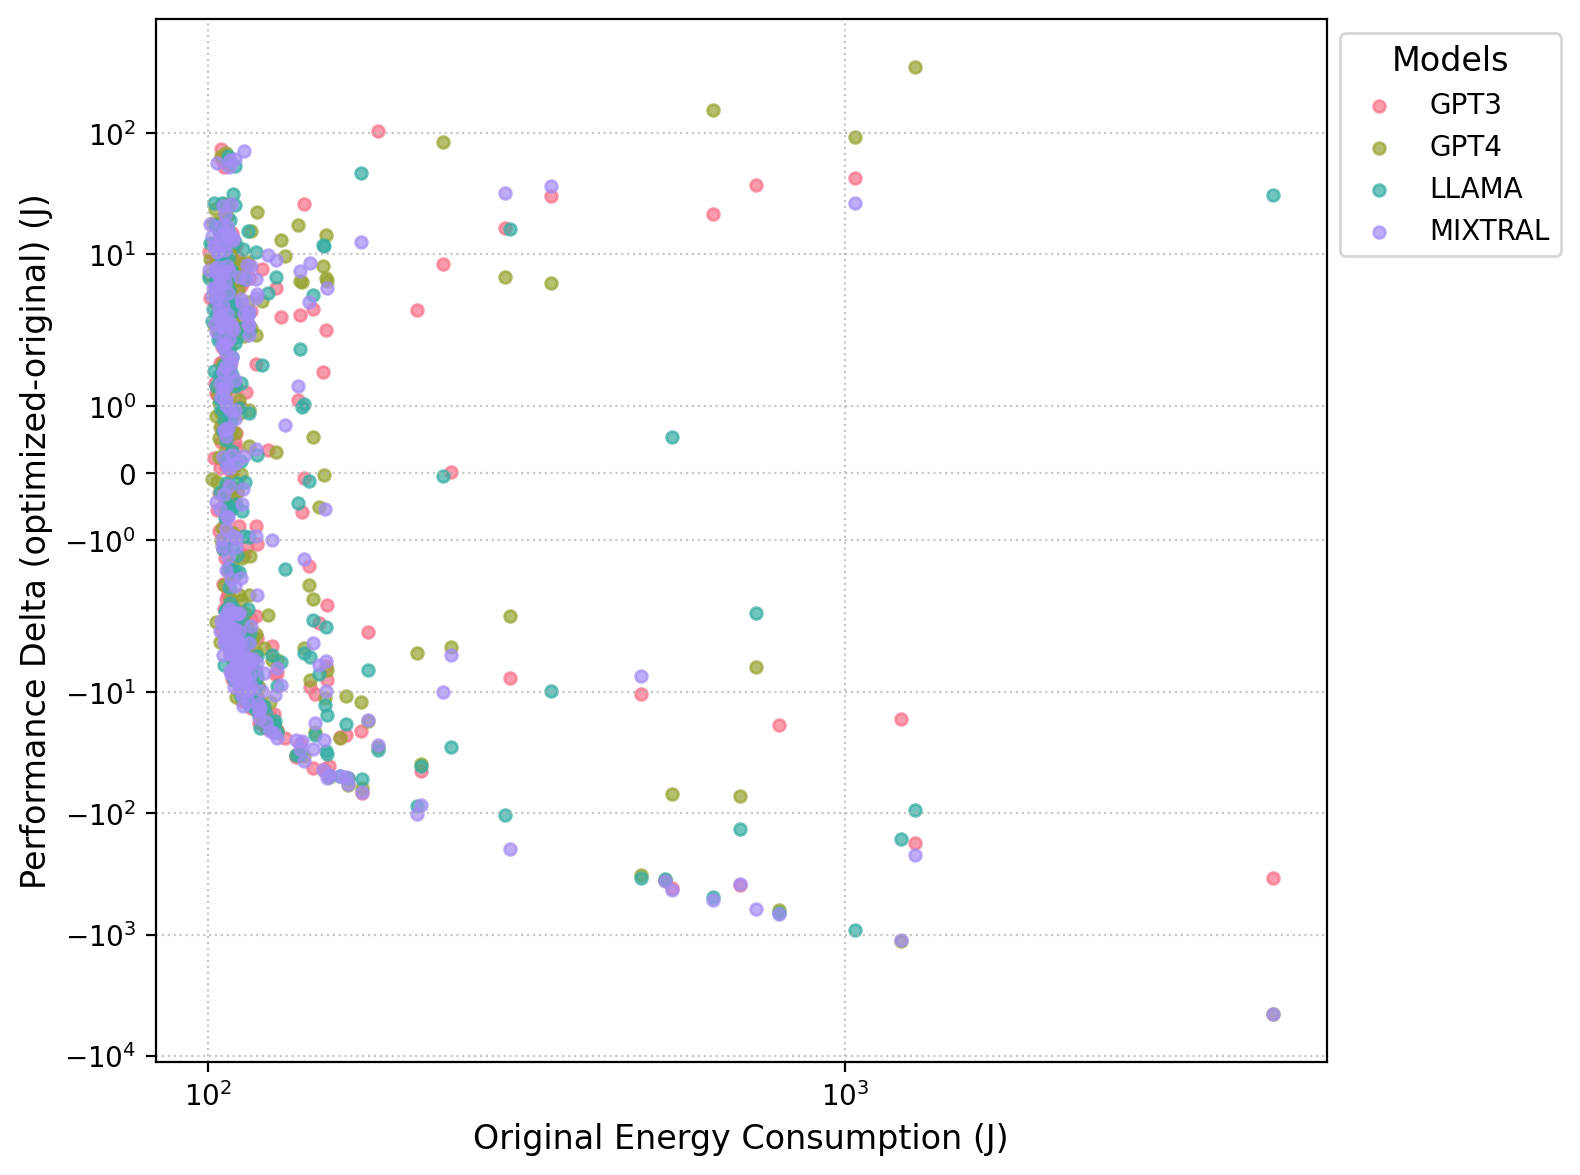

In [98]:
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MaxNLocator, LogLocator,ScalarFormatter, LogFormatterSciNotation,LogFormatter

# Assume df is your DataFrame
models = ['optimized_gpt3', 'optimized_gpt4', 'optimized_llama', 'optimized_mixtral']

# Remove rows where any of the values are zero
for model in models:
    df = df[(df['original_energy'] != 0) & (df[f'{model}_energy'] != 0)]

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Color palette
colors = sns.color_palette("husl", n_colors=len(models))

for i, model in enumerate(models):
    # Calculate energy difference
    df[f'{model}_energy_diff'] = df[f'{model}_energy'] - df['original_energy']
    
    # Scatter plot with original energy on x-axis and energy difference on y-axis
    ax.scatter(df['original_energy'], df[f'{model}_energy_diff'], 
               label=model.replace('optimized_', '').upper(), 
               color=colors[i], alpha=0.7, s=18)

# Apply symlog scale with a threshold for both axes
plt.xscale('symlog')
plt.yscale('symlog')

# Customize the plot
ax.set_xlabel('Original Energy Consumption (J)', fontsize=14, color='black')
ax.set_ylabel('Performance Delta (optimized-original) (J)', fontsize=14, color='black')
ax.legend(title='Models', title_fontsize='12', fontsize='10', loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(True, linestyle=':', alpha=0.7)


#plt.grid(True, which='both', axis='both')
plt.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig("./../resource/energy-delta.pdf", format='pdf')  # Save as PDF
plt.show()

# Close the plot
plt.close()

In [101]:
df

script_name  original_energy  \
0                                  附件-profit       106.236793   
1                      cheb-test_galleryball       103.784445   
2                              tools-runTest       121.480022   
3       chapter8 基于量子遗传算法的函数寻优算法-QuantumMain       103.088433   
5                    瑞利衰落信道下MRC性能-MRC_scheme       110.536945   
..                                       ...              ...   
450  天线选择技术-MIMO_channel_cap_ant_sel_optimal       105.915451   
454                         M-wuding2_yingli       166.275500   
457           2018_MCMProblemC_DATA-uscities       110.305595   
466                           多目标模糊综合评价-main       116.962374   
474    chapter5 基于遗传算法的LQR控制器优化设计-GA_LQR_run       101.519750   

     optimized_gpt3_energy  optimized_gpt4_energy  optimized_llama_energy  \
0               109.775544             104.571878              100.285295   
1               107.966792             104.976427              120.313649   
2               128.938474             125.570610              123.082865   
3               109.804060             103.940732              107.299842   
5               111.002995             107.704079              106.104821   
..                     ...                    ...                     ...   
450             112.416061             110.410452              113.794529   
454             115.181148             107.702391              115.427613   
457             105.493480             106.301476              135.914057   
466             114.475694             132.572307              106.408736   
474             108.086697             101.426303              113.517695   

     optimized_mixtral_energy  original_memory  optimized_gpt3_memory  \
0                  120.497503     6.359054e+07           5.726044e+07   
1                  110.792849     7.824493e+07           6.596799e+07   
2                  111.750414     4.932977e+07           5.904534e+07   
3                  105.369954     6.111846e+07           6.356664e+07   
5                  107.567642     5.346632e+07           5.736830e+07   
..                        ...              ...                    ...   
450                117.736101     6.477319e+07           6.704633e+07   
454                108.986782     7.477139e+07           5.716951e+07   
457                104.258411     5.399047e+07           8.018302e+07   
466                108.305284     6.219953e+07           5.890895e+07   
474                115.519214     7.399124e+07           5.075900e+07   

     optimized_gpt4_memory  optimized_llama_memory  ...  \
0             8.280569e+07            5.969920e+07  ...   
1             6.825588e+07            6.132995e+07  ...   
2             6.287251e+07            6.266839e+07  ...   
3             7.033665e+07            5.904930e+07  ...   
5             7.271970e+07            7.260788e+07  ...   
..                     ...                     ...  ...   
450           6.432167e+07            6.344417e+07  ...   
454           6.022390e+07            5.834752e+07  ...   
457           7.793104e+07            1.632733e+08  ...   
466           7.763886e+07            7.740976e+07  ...   
474           6.843692e+07            6.507547e+07  ...   

     optimized_llama_energy_diff  optimized_mixtral_energy_diff  \
0                      -5.951498                      14.260711   
1                      16.529205                       7.008404   
2                       1.602843                      -9.729608   
3                       4.211409                       2.281521   
5                      -4.432123                      -2.969303   
..                           ...                            ...   
450                     7.879079                      11.820650   
454                   -50.847887                     -57.288719   
457                    25.608462                      -6.047185   
466                   -10.553638                      -8.657090   
474 

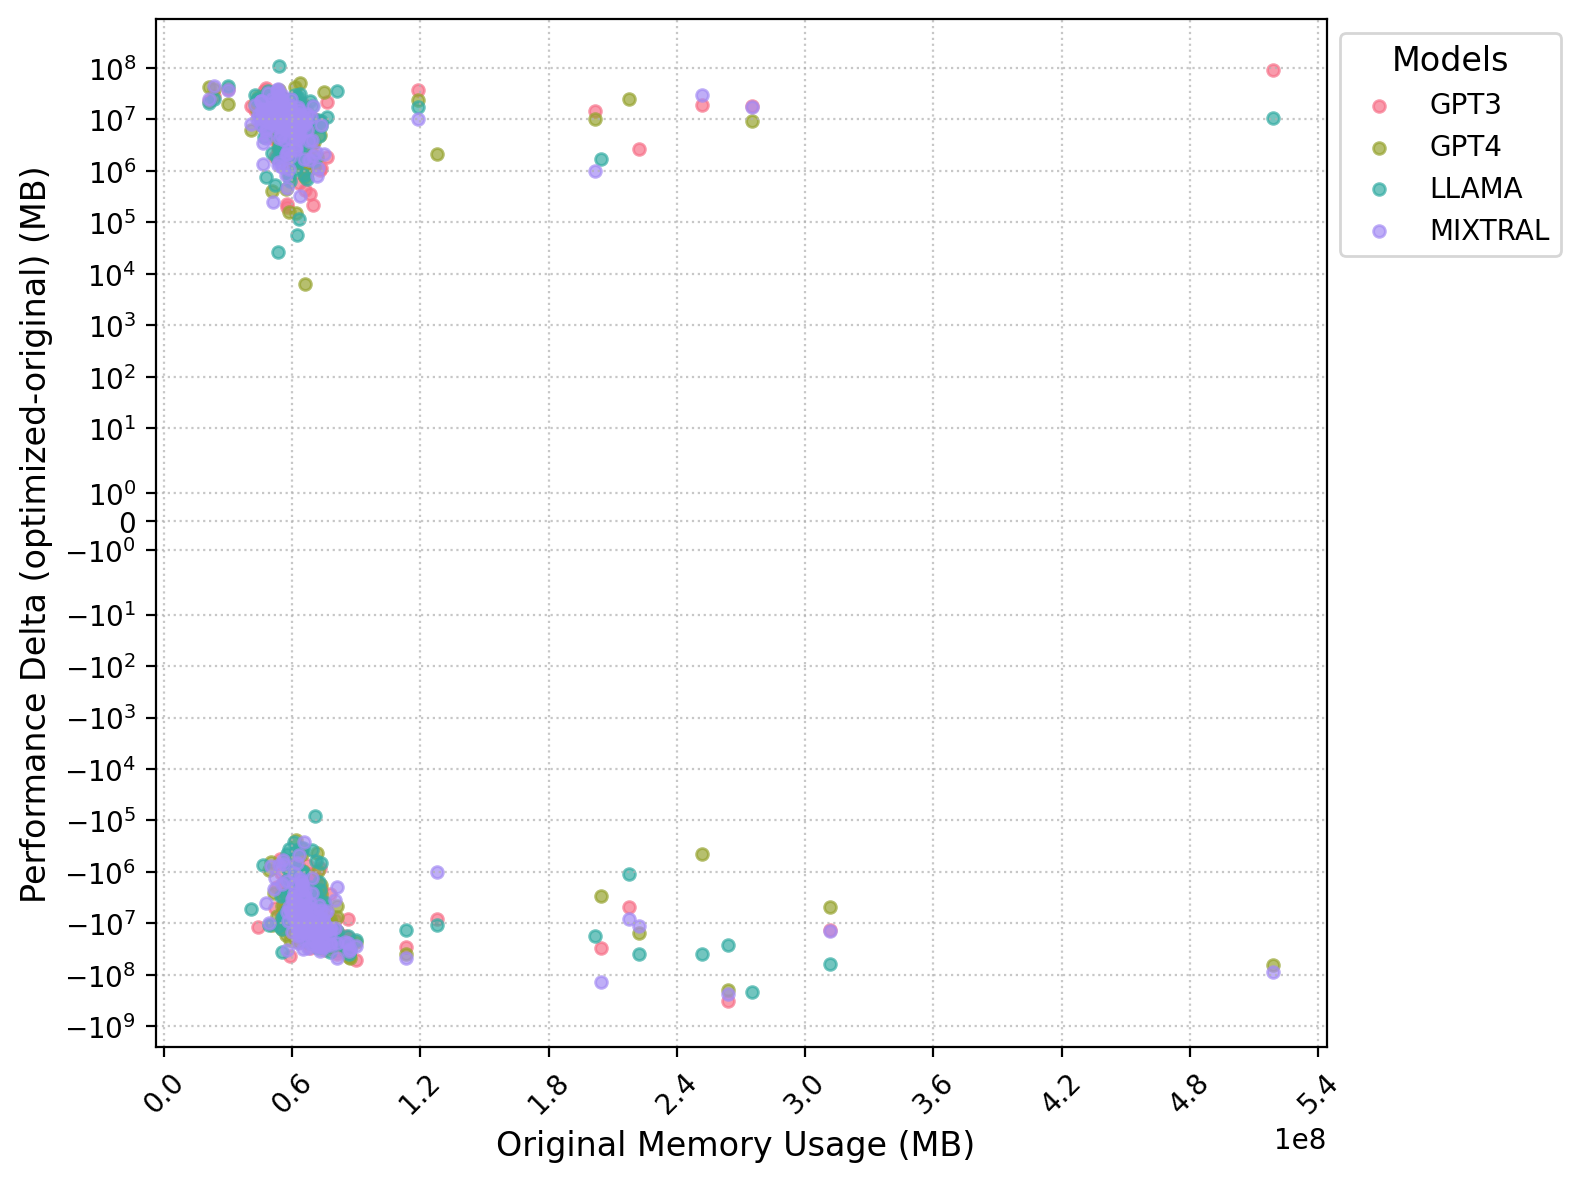

In [109]:

# Remove rows where any of the values are zero
for model in models:
    df = df[(df['original_memory'] != 0) & (df[f'{model}_memory'] != 0)]

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Color palette
colors = sns.color_palette("husl", n_colors=len(models))

for i, model in enumerate(models):
    # Calculate energy difference
    df[f'{model}_memory_diff'] =  df[f'{model}_memory'] - df['original_memory']
    
    # Scatter plot with original energy on x-axis and energy difference on y-axis
    ax.scatter(df['original_memory'], df[f'{model}_memory_diff'], 
               label=model.replace('optimized_', '').upper(), 
               color=colors[i], alpha=0.7, s=18)
    

#plt.xscale('symlog')
#plt.yscale('symlog')

# Apply linear scale for memory values
plt.xscale('linear')
plt.yscale('symlog')

# Customize the plot
ax.set_xlabel('Original Memory Usage (MB) ', fontsize=12)
ax.set_ylabel('Performance Delta (optimized-original) (MB)', fontsize=12)
ax.legend(title='Models', title_fontsize='12', fontsize='10', loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(True, linestyle=':', alpha=0.7)

# Set the x-ticks
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.tick_params(axis='x', which='major', labelsize=10, rotation=45)  # Rotate labels if needed


#plt.grid(True, which='both', axis='both')
plt.grid(True)


# Adjust layout and display the plot
plt.tight_layout()
plt.savefig("./../resource/memory-delta.pdf", format='pdf')  # Save as PDF
plt.show()

# Close the plot
plt.close()

                            script_name  original_energy  \
0                             附件-profit       106.236793   
1                 cheb-test_galleryball       103.784445   
2                         tools-runTest       121.480022   
3  chapter8 基于量子遗传算法的函数寻优算法-QuantumMain       103.088433   
5               瑞利衰落信道下MRC性能-MRC_scheme       110.536945   

   optimized_gpt3_energy  optimized_gpt4_energy  optimized_llama_energy  \
0             109.775544             104.571878              100.285295   
1             107.966792             104.976427              120.313649   
2             128.938474             125.570610              123.082865   
3             109.804060             103.940732              107.299842   
5             111.002995             107.704079              106.104821   

   optimized_mixtral_energy  original_memory  optimized_gpt3_memory  \
0                120.497503     6.359054e+07           5.726044e+07   
1                110.792849     7.824493e+07  

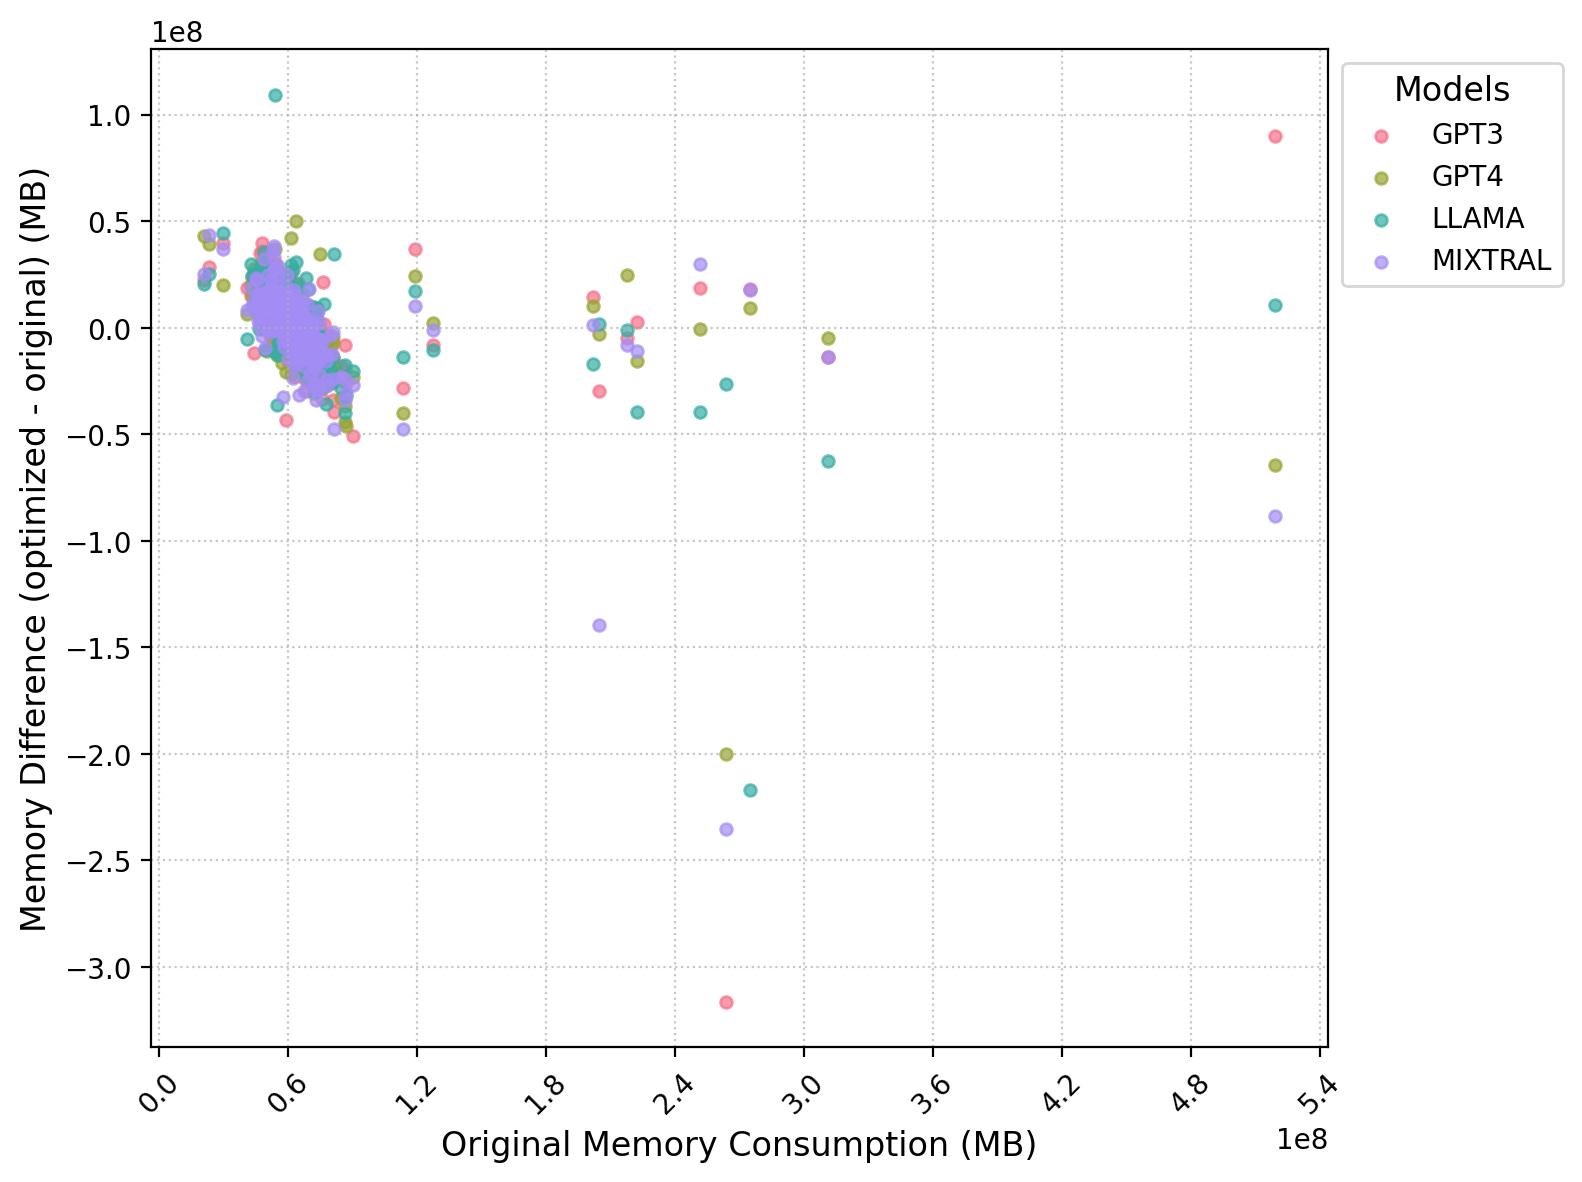

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Print the first few rows of the DataFrame to inspect
print(df.head())

# Models to be analyzed
models = ['optimized_gpt3', 'optimized_gpt4', 'optimized_llama', 'optimized_mixtral']

# Remove rows where any of the values are zero
for model in models:
    df = df[(df['original_memory'] != 0) & (df[f'{model}_memory'] != 0)]

# Print summary statistics of the memory values to understand their range
print(df[['original_memory'] + [f'{model}_memory' for model in models]].describe())

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Color palette
colors = sns.color_palette("husl", n_colors=len(models))

for i, model in enumerate(models):
    # Calculate absolute memory difference
    df[f'{model}_memory_diff'] = df[f'{model}_memory'] - df['original_memory']
    
    # Print summary statistics of the memory differences to understand their range
    print(f"\nSummary statistics for {model} memory differences:")
    print(df[f'{model}_memory_diff'].describe())
    
    # Scatter plot with original memory on x-axis and memory difference on y-axis
    ax.scatter(df['original_memory'], df[f'{model}_memory_diff'], 
               label=model.replace('optimized_', '').upper(), 
               color=colors[i], alpha=0.7, s=18)

# Apply linear scale for both axes
plt.xscale('linear')
plt.yscale('linear')

# Customize the plot
ax.set_xlabel('Original Memory Consumption (MB)', fontsize=12)
ax.set_ylabel('Memory Difference (optimized - original) (MB)', fontsize=12)
ax.legend(title='Models', title_fontsize='12', fontsize='10', loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(True, linestyle=':', alpha=0.7)

# Set the x-ticks
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.tick_params(axis='x', which='major', labelsize=10, rotation=45)  # Rotate labels if needed

# Set the y-ticks
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
ax.tick_params(axis='y', which='major', labelsize=10)

# Ensure grid lines are displayed
plt.grid(True, which='both', axis='both')

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig("./../resource/memory-delta.pdf", format='pdf')  # Save as PDF
plt.show()

# Close the plot
plt.close()


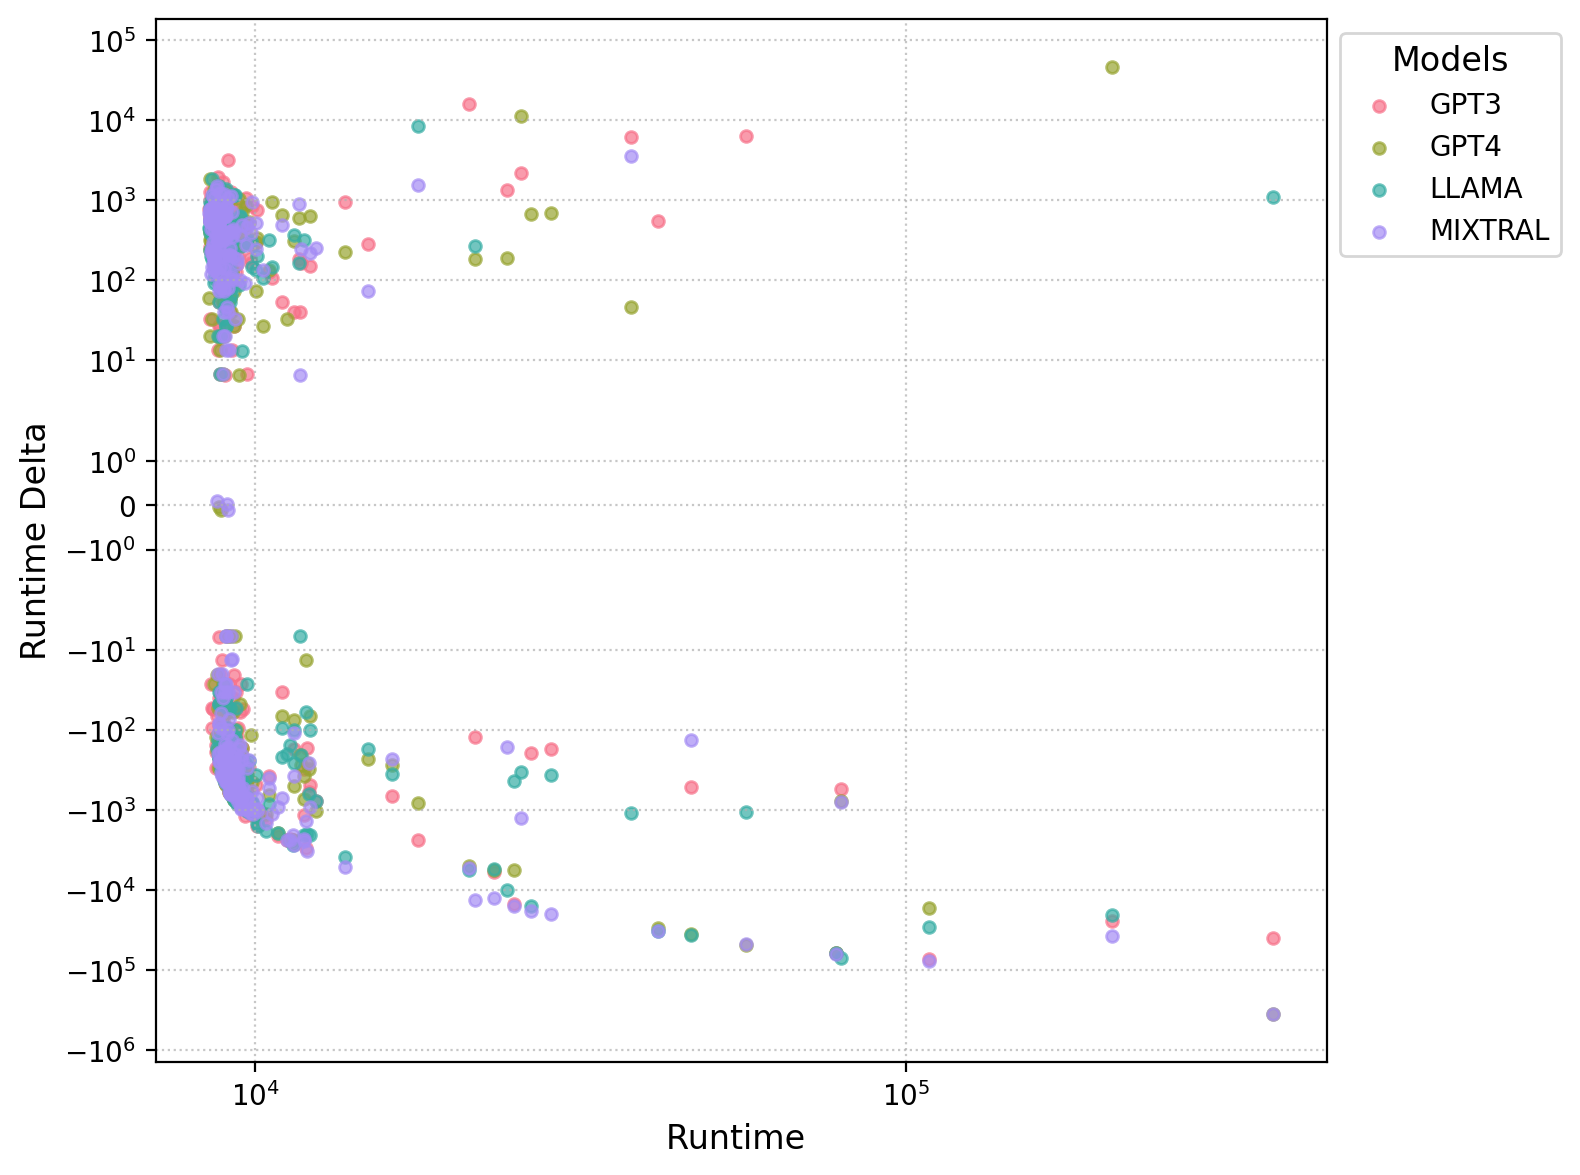

In [113]:
# Remove rows where any of the values are zero
for model in models:
    df = df[(df['original_time'] != 0) & (df[f'{model}_time'] != 0)]

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Color palette
colors = sns.color_palette("husl", n_colors=len(models))

for i, model in enumerate(models):
    # Calculate energy difference
    df[f'{model}_time_diff'] = df[f'{model}_time'] - df['original_time']
    
    # Scatter plot with original energy on x-axis and energy difference on y-axis
    ax.scatter(df['original_time'], df[f'{model}_time_diff'], 
               label=model.replace('optimized_', '').upper(), 
               color=colors[i], alpha=0.7, s=18)


plt.xscale('symlog')
plt.yscale('symlog')
plt.grid(True)

# Customize the plot
ax.set_xlabel('Runtime ', fontsize=12)
ax.set_ylabel('Runtime Delta', fontsize=12)
ax.legend(title='Models', title_fontsize='12', fontsize='10', loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(True, linestyle=':', alpha=0.7)


# Adjust layout and display the plot
plt.tight_layout()
plt.savefig("./../resource/time-delta.pdf", format='pdf')  # Save as PDF
plt.show()

# Close the plot
plt.close()

       original_time  optimized_gpt3_time  optimized_gpt4_time  \
count     275.000000           275.000000           275.000000   
mean        0.013262             0.012547             0.011460   
std         0.026362             0.022904             0.016412   
min         0.008490             0.008416             0.008483   
25%         0.008850             0.008823             0.008893   
50%         0.009117             0.009130             0.009143   
75%         0.009553             0.009537             0.009640   
max         0.367294             0.327923             0.254334   

       optimized_llama_time  optimized_mixtral_time  
count            275.000000              275.000000  
mean               0.012197                0.010679  
std                0.024760                0.011128  
min                0.008523                0.008510  
25%                0.008813                0.008827  
50%                0.009070                0.009077  
75%                0.009590

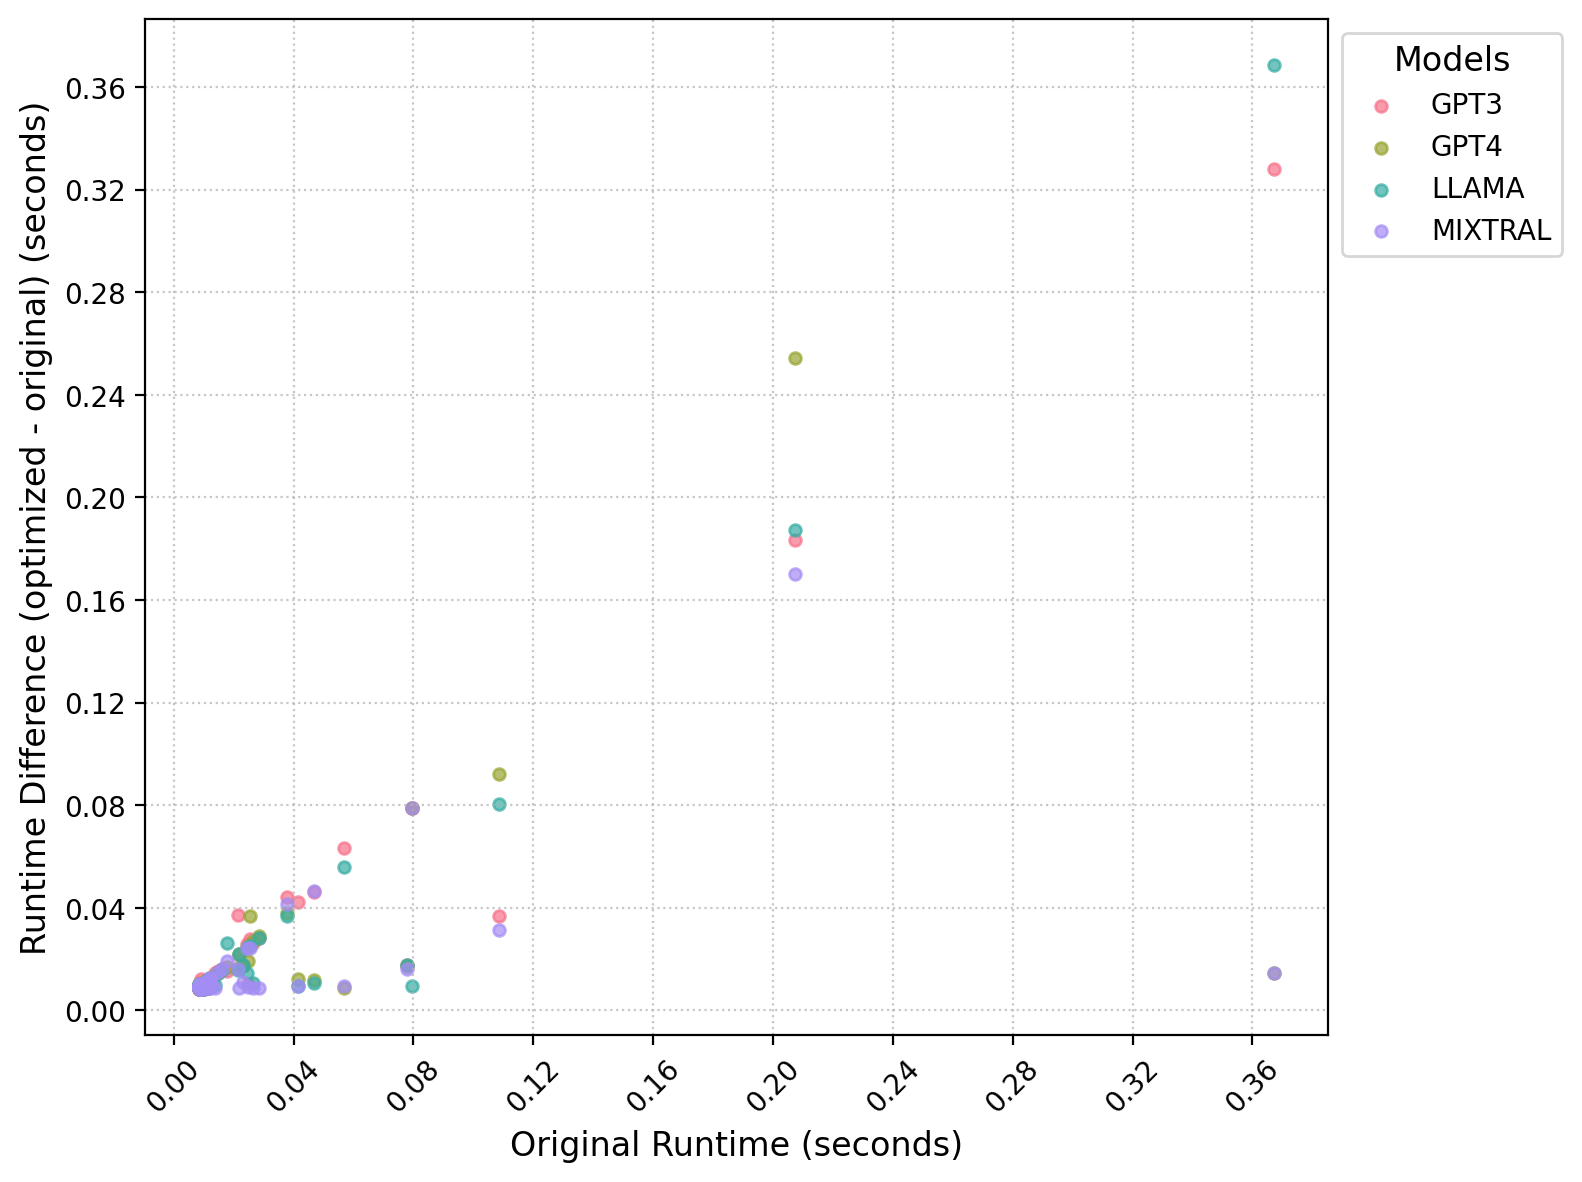

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Models to be analyzed
models = ['optimized_gpt3', 'optimized_gpt4', 'optimized_llama', 'optimized_mixtral']

# Remove rows where any of the values are zero
for model in models:
    df = df[(df['original_time'] != 0) & (df[f'{model}_time'] != 0)]

# Convert time from milliseconds to seconds
df['original_time'] = df['original_time'] / 1000
for model in models:
    df[f'{model}_time'] = df[f'{model}_time'] / 1000

# Print summary statistics of the time values to understand their range
print(df[['original_time'] + [f'{model}_time' for model in models]].describe())

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Color palette
colors = sns.color_palette("husl", n_colors=len(models))

for i, model in enumerate(models):
    # Calculate time difference
    df[f'{model}_time_diff'] = df[f'{model}_time'] - df['original_time']
    
    # Print summary statistics of the time differences to understand their range
    print(f"\nSummary statistics for {model} time differences:")
    print(df[f'{model}_time_diff'].describe())
    
    # Scatter plot with original time on x-axis and time difference on y-axis
    ax.scatter(df['original_time'], df[f'{model}_time_diff'], 
               label=model.replace('optimized_', '').upper(), 
               color=colors[i], alpha=0.7, s=18)

# Apply linear scale for both axes
plt.xscale('linear')
plt.yscale('linear')

# Customize the plot
ax.set_xlabel('Original Runtime (seconds)', fontsize=12)
ax.set_ylabel('Runtime Difference (optimized - original) (seconds)', fontsize=12)
ax.legend(title='Models', title_fontsize='12', fontsize='10', loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(True, linestyle=':', alpha=0.7)

# Set the x-ticks
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.tick_params(axis='x', which='major', labelsize=10, rotation=45)  # Rotate labels if needed

# Set the y-ticks
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
ax.tick_params(axis='y', which='major', labelsize=10)

# Ensure grid lines are displayed
plt.grid(True, which='both', axis='both')

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig("./../resource/time-delta.pdf", format='pdf')  # Save as PDF
plt.show()

# Close the plot
plt.close()



In [48]:
import pandas as pd
from scipy.stats import wilcoxon, mannwhitneyu

# Metrics to be analyzed
metrics = ['energy', 'memory', 'time']
id_vars = ['script_name']
models = ['original', 'optimized_gpt3', 'optimized_gpt4', 'optimized_llama', 'optimized_mixtral']

# Initialize a dictionary to store the results for all metrics
general_results = {}

# Filter out rows where any of the values are zero for each metric
for metric in metrics:
    metric_results = {}
    relevant_columns = [f'original_{metric}'] + [f'{model}_{metric}' for model in models[1:]]
    df_filtered = df[(df[relevant_columns] != 0).all(axis=1)]
    
    original_metric = df_filtered[f'original_{metric}']
    
    for model in models[1:]:  # Skip 'original' as it's the baseline
        optimized_metric = df_filtered[f'{model}_{metric}']
        
        # Wilcoxon signed-rank test
        wilcoxon_stat, wilcoxon_p = wilcoxon(original_metric, optimized_metric, alternative='two-sided')

        # Calculate effect size
        n = len(original_metric)
        z = (wilcoxon_stat - n*(n+1)/4) / np.sqrt(n*(n+1)*(2*n+1)/24)
        effect_size = z / np.sqrt(n)
        
        # Mann-Whitney U test
        # mannwhitney_stat, mannwhitney_p = mannwhitneyu(original_metric, optimized_metric, alternative='two-sided')
        
        # Store the results
        metric_results[model] = {
            'Wilcoxon Stat': wilcoxon_stat,
            'Wilcoxon p-value': wilcoxon_p,
            'Effect Size': effect_size
            #'Mann-Whitney Stat': mannwhitney_stat,
            #'Mann-Whitney p-value': mannwhitney_p
        }
    
    general_results[metric] = pd.DataFrame(metric_results).T

# Display the results for each metric
for metric, results_df in general_results.items():
    print(f"{metric.capitalize()} Statistical Test Results:")
    print(results_df)
    print("\n")

Energy Statistical Test Results:
                   Wilcoxon Stat  Wilcoxon p-value  Effect Size
optimized_gpt3           17051.0          0.144973    -0.087892
optimized_gpt4           18177.0          0.545497    -0.036454
optimized_llama          15750.0          0.014562    -0.147324
optimized_mixtral        14728.0          0.001294    -0.194010


Memory Statistical Test Results:
                   Wilcoxon Stat  Wilcoxon p-value  Effect Size
optimized_gpt3           17046.0          0.143931    -0.088120
optimized_gpt4           17223.0          0.184436    -0.080034
optimized_llama          16221.0          0.036953    -0.125807
optimized_mixtral        18096.0          0.505486    -0.040154


Time Statistical Test Results:
                   Wilcoxon Stat  Wilcoxon p-value  Effect Size
optimized_gpt3           17776.0          0.363721    -0.054772
optimized_gpt4           18373.0          0.648359    -0.027500
optimized_llama          16250.0          0.038988    -0.124483
opt

Whether the optimized models consistently reduce energy consumption (i.e., the optimized energy is less than the original energy)

In [50]:
import pandas as pd
from scipy.stats import wilcoxon
import numpy as np

# Metrics to be analyzed
metrics = ['energy', 'memory', 'time']
id_vars = ['script_name']
models = ['original', 'optimized_gpt3', 'optimized_gpt4', 'optimized_llama', 'optimized_mixtral']

# Initialize a dictionary to store the results for all metrics
general_results = {}

# Filter out rows where any of the values are zero for each metric
for metric in metrics:
    metric_results = {}
    relevant_columns = [f'original_{metric}'] + [f'{model}_{metric}' for model in models[1:]]
    df_filtered = df[(df[relevant_columns] != 0).all(axis=1)]
    
    original_metric = df_filtered[f'original_{metric}']
    
    for model in models[1:]:  # Skip 'original' as it's the baseline
        optimized_metric = df_filtered[f'{model}_{metric}']
        
        # One-sided Wilcoxon signed-rank test (optimized < original)
        wilcoxon_stat, wilcoxon_p = wilcoxon(original_metric, optimized_metric, alternative='greater')
        
        # Calculate effect size
        n = len(original_metric)
        z = (wilcoxon_stat - n*(n+1)/4) / np.sqrt(n*(n+1)*(2*n+1)/24)
        effect_size = z / np.sqrt(n)
        
        # Store the results
        metric_results[model] = {
            'Wilcoxon Stat': wilcoxon_stat,
            'Wilcoxon p-value': wilcoxon_p,
            'Effect Size': effect_size
        }
    
    general_results[metric] = pd.DataFrame(metric_results).T

# Display the results for each metric
for metric, results_df in general_results.items():
    print(f"{metric.capitalize()} Statistical Test Results:")
    print(results_df)
    print("\n")


Energy Statistical Test Results:
                   Wilcoxon Stat  Wilcoxon p-value  Effect Size
optimized_gpt3           20899.0          0.072487     0.087892
optimized_gpt4           19773.0          0.272748     0.036454
optimized_llama          22200.0          0.007281     0.147324
optimized_mixtral        23222.0          0.000647     0.194010


Memory Statistical Test Results:
                   Wilcoxon Stat  Wilcoxon p-value  Effect Size
optimized_gpt3           17046.0          0.928034    -0.088120
optimized_gpt4           17223.0          0.907782    -0.080034
optimized_llama          16221.0          0.981523    -0.125807
optimized_mixtral        18096.0          0.747257    -0.040154


Time Statistical Test Results:
                   Wilcoxon Stat  Wilcoxon p-value  Effect Size
optimized_gpt3           20174.0          0.181860     0.054772
optimized_gpt4           18373.0          0.675820    -0.027500
optimized_llama          21700.0          0.019494     0.124483
opt

In [51]:
import numpy as np

# Function to perform bootstrapping
def bootstrap(data, num_bootstrap=1000):
    boot_means = []
    for _ in range(num_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        boot_means.append(np.mean(sample))
    return np.percentile(boot_means, [2.5, 97.5])

# Example: Bootstrapping effect sizes for original vs optimized_llama energy consumption
original_energy = df_filtered_all['original_energy']
optimized_llama_energy = df_filtered_all['optimized_llama_energy']

effect_sizes = []
for _ in range(1000):
    sample_original = np.random.choice(original_energy, size=len(original_energy), replace=True)
    sample_optimized = np.random.choice(optimized_llama_energy, size=len(optimized_llama_energy), replace=True)
    wilcoxon_stat, _ = wilcoxon(sample_original, sample_optimized, alternative='greater')
    z = (wilcoxon_stat - len(sample_original)*(len(sample_original)+1)/4) / np.sqrt(len(sample_original)*(len(sample_original)+1)*(2*len(sample_original)+1)/24)
    effect_size = z / np.sqrt(len(sample_original))
    effect_sizes.append(effect_size)

# Calculate 95% confidence interval for the effect size
ci = np.percentile(effect_sizes, [2.5, 97.5])
print(f"95% CI for effect size: {ci}")


95% CI for effect size: [-0.07501055  0.15887536]



Energy Statistical Test Results:
                   Wilcoxon Stat  Wilcoxon p-value  Effect Size
optimized_gpt3           20899.0          0.072487     0.087892
optimized_gpt4           19773.0          0.272748     0.036454
optimized_llama          22200.0          0.007281     0.147324
optimized_mixtral        23222.0          0.000647     0.194010


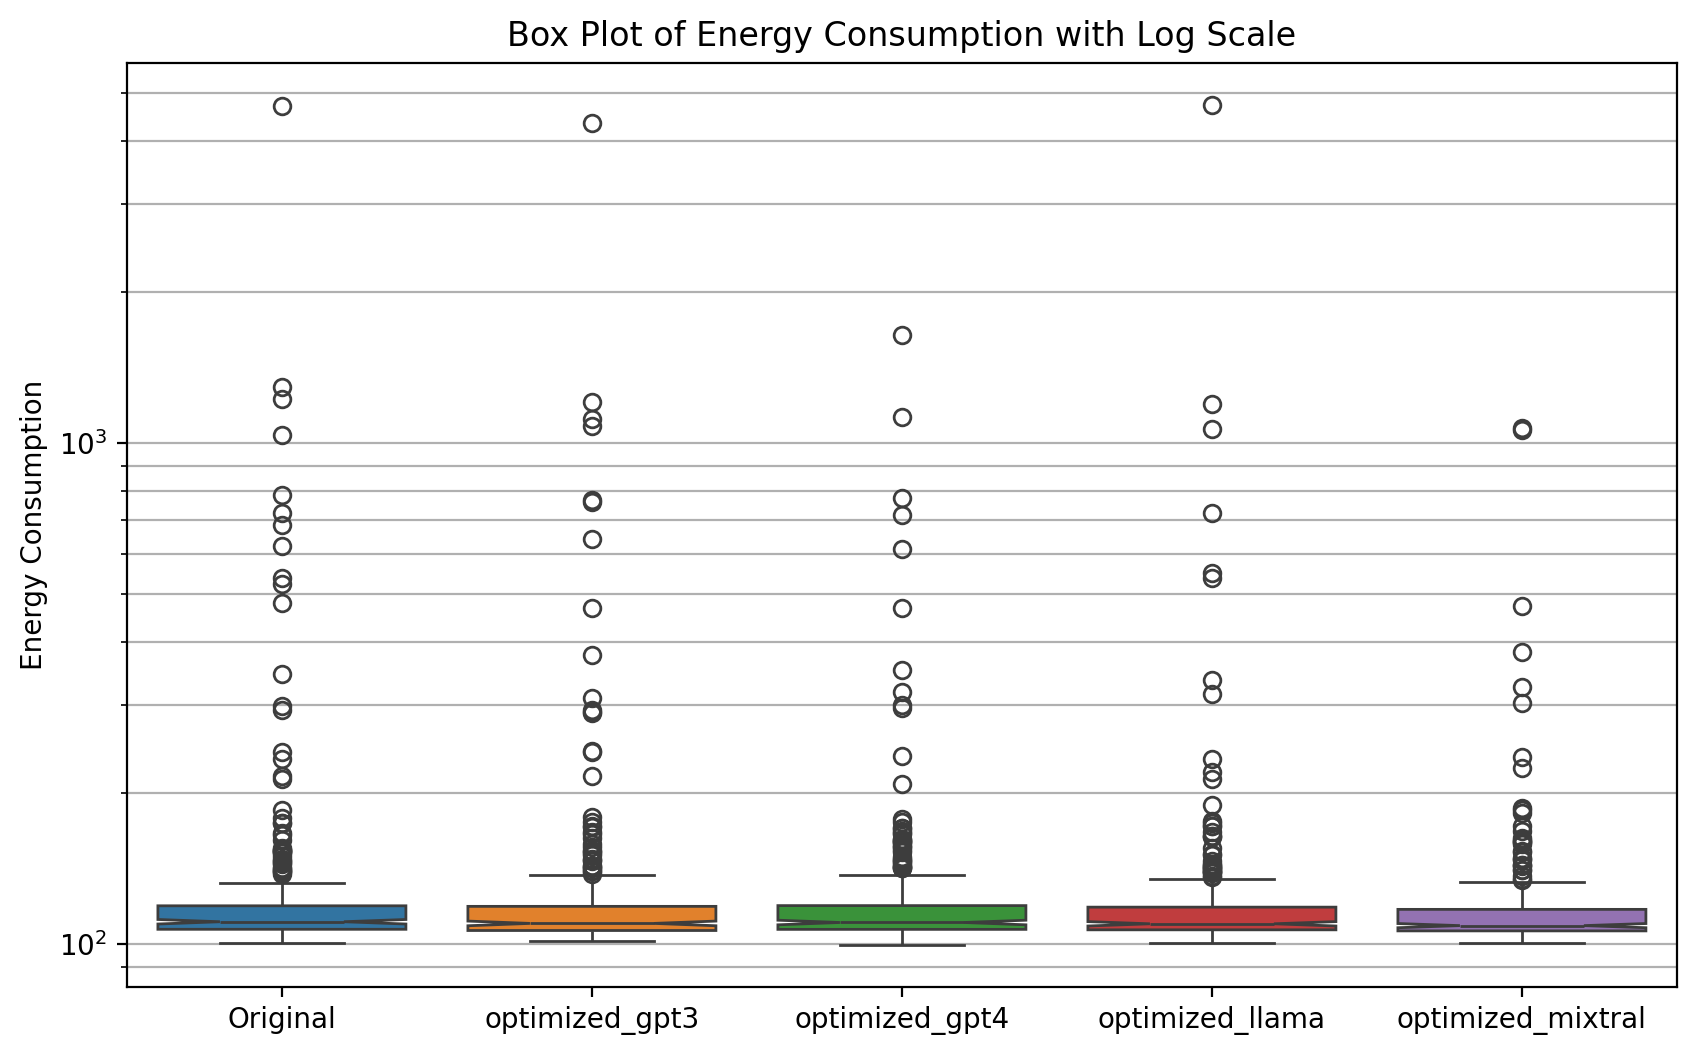


Memory Statistical Test Results:
                   Wilcoxon Stat  Wilcoxon p-value  Effect Size
optimized_gpt3           17046.0          0.928034    -0.088120
optimized_gpt4           17223.0          0.907782    -0.080034
optimized_llama          16221.0          0.981523    -0.125807
optimized_mixtral        18096.0          0.747257    -0.040154


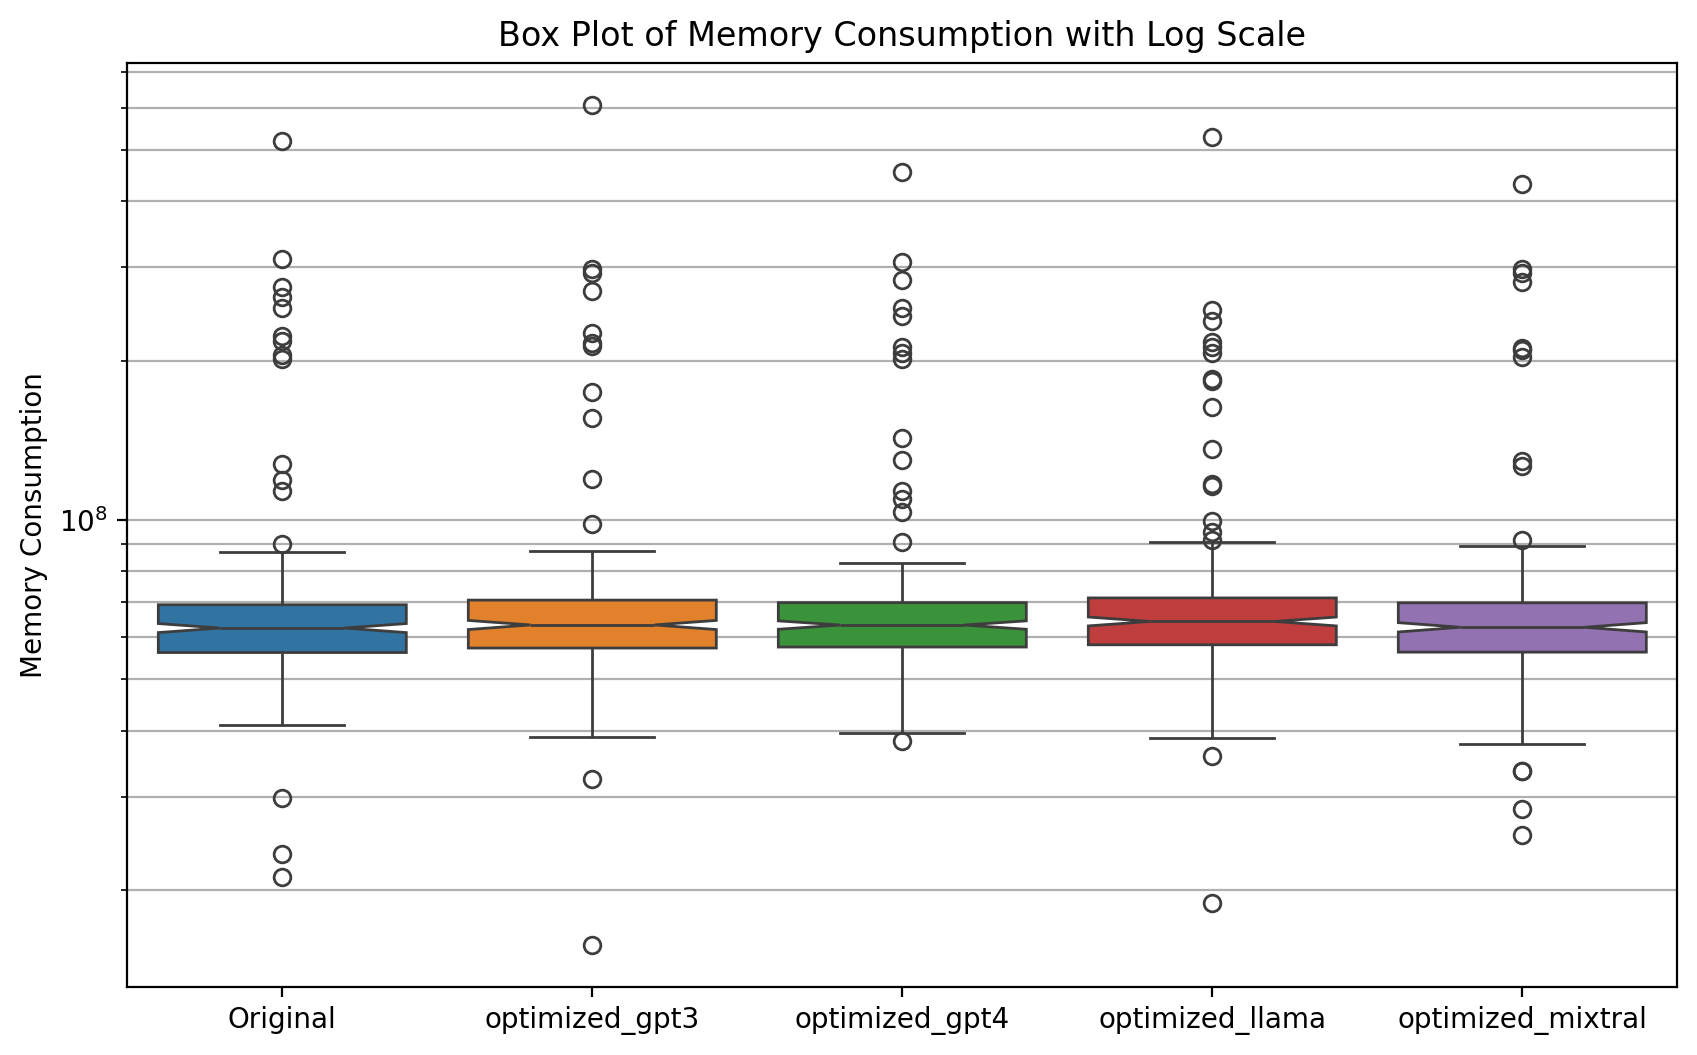


Time Statistical Test Results:
                   Wilcoxon Stat  Wilcoxon p-value  Effect Size
optimized_gpt3           20174.0          0.181860     0.054772
optimized_gpt4           18373.0          0.675820    -0.027500
optimized_llama          21700.0          0.019494     0.124483
optimized_mixtral        21170.0          0.048175     0.100271


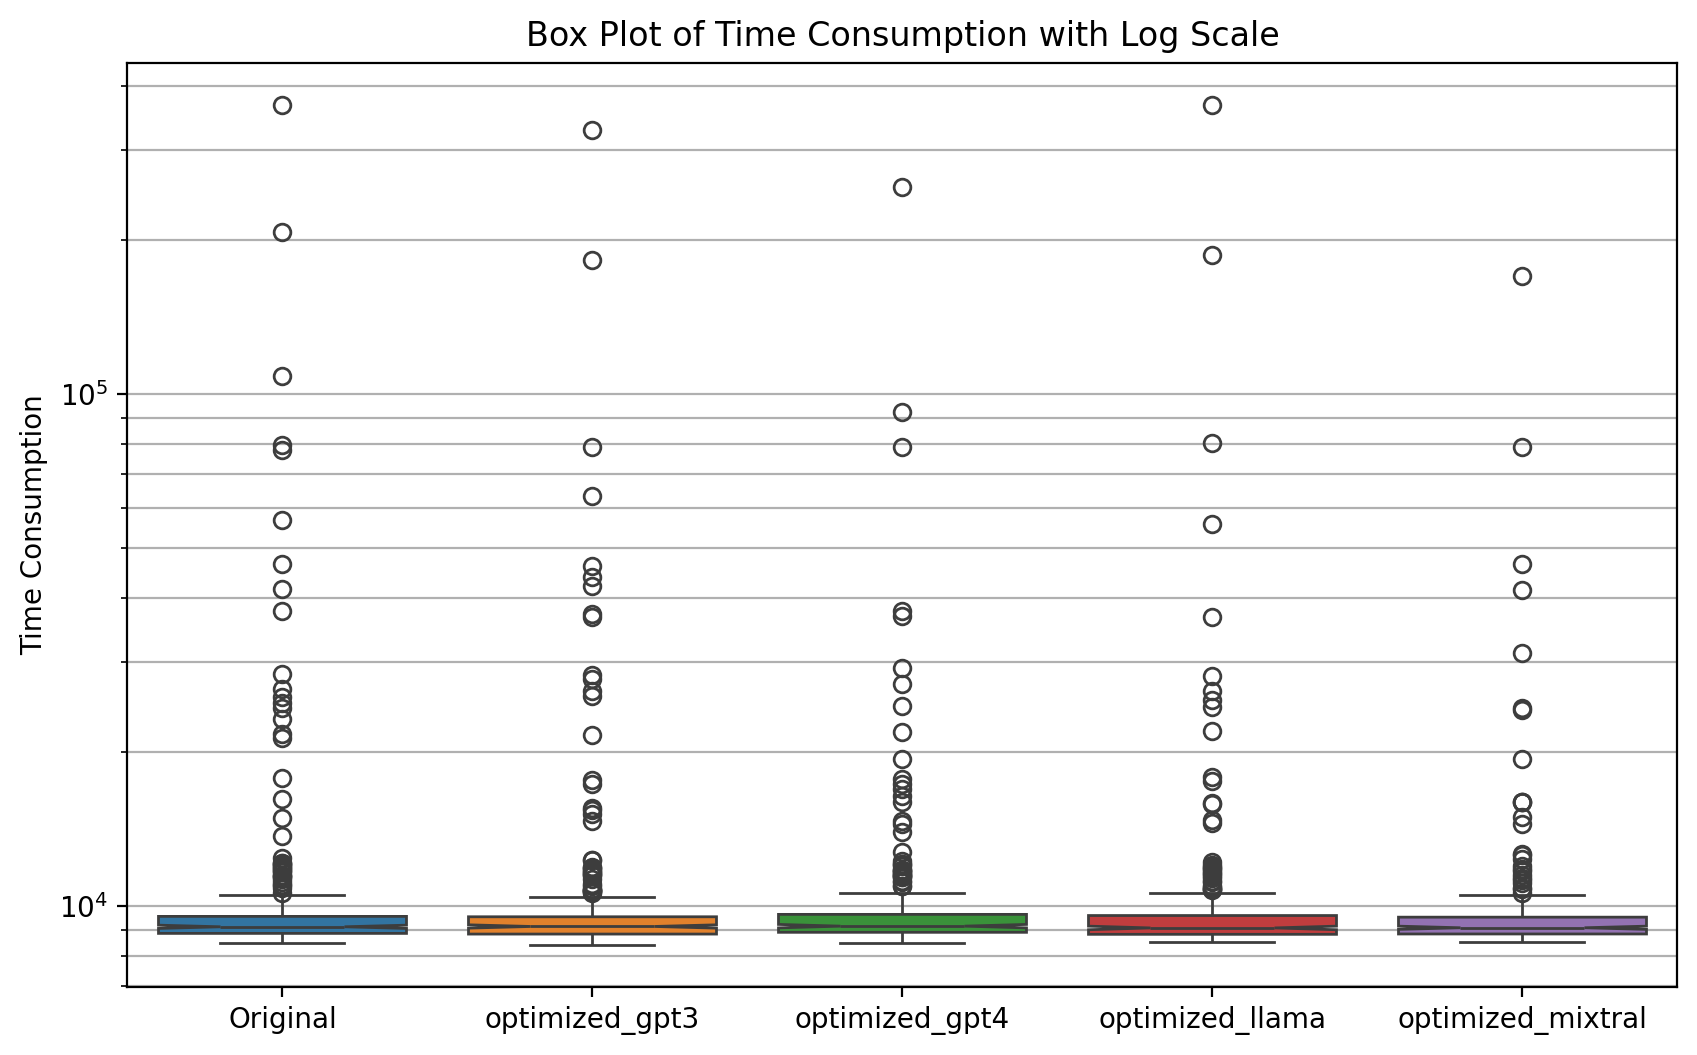

Energy Statistical Test Results:
                   Wilcoxon Stat  Wilcoxon p-value  Effect Size
optimized_gpt3           20899.0          0.072487     0.087892
optimized_gpt4           19773.0          0.272748     0.036454
optimized_llama          22200.0          0.007281     0.147324
optimized_mixtral        23222.0          0.000647     0.194010


Memory Statistical Test Results:
                   Wilcoxon Stat  Wilcoxon p-value  Effect Size
optimized_gpt3           17046.0          0.928034    -0.088120
optimized_gpt4           17223.0          0.907782    -0.080034
optimized_llama          16221.0          0.981523    -0.125807
optimized_mixtral        18096.0          0.747257    -0.040154


Time Statistical Test Results:
                   Wilcoxon Stat  Wilcoxon p-value  Effect Size
optimized_gpt3           20174.0          0.181860     0.054772
optimized_gpt4           18373.0          0.675820    -0.027500
optimized_llama          21700.0          0.019494     0.124483
opt

In [56]:
import pandas as pd
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Metrics to be analyzed
metrics = ['energy', 'memory', 'time']
models = ['original', 'optimized_gpt3', 'optimized_gpt4', 'optimized_llama', 'optimized_mixtral']

# Initialize a dictionary to store the results for all metrics
general_results = {}

# Function to create a box plot with log scale
def create_log_boxplot(data, labels, title, ylabel):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, notch=True)
    plt.yscale('log')
    plt.xticks(range(len(labels)), labels)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.grid(True, which='both', axis='y')
    plt.show()

# Perform Wilcoxon signed-rank test and visualize
for metric in metrics:
    print(f"\n{metric.capitalize()} Statistical Test Results:")
    metric_results = {}
    relevant_columns = [f'original_{metric}'] + [f'{model}_{metric}' for model in models[1:]]
    df_filtered = df[(df[relevant_columns] != 0).all(axis=1)]
    
    original_metric = df_filtered[f'original_{metric}']
    
    for model in models[1:]:  # Skip 'original' as it's the baseline
        optimized_metric = df_filtered[f'{model}_{metric}']
        
        # One-sided Wilcoxon signed-rank test (optimized < original)
        wilcoxon_stat, wilcoxon_p = wilcoxon(original_metric, optimized_metric, alternative='greater')
        
        # Calculate effect size
        n = len(original_metric)
        z = (wilcoxon_stat - n*(n+1)/4) / np.sqrt(n*(n+1)*(2*n+1)/24)
        effect_size = z / np.sqrt(n)
        
        # Store the results
        metric_results[model] = {
            'Wilcoxon Stat': wilcoxon_stat,
            'Wilcoxon p-value': wilcoxon_p,
            'Effect Size': effect_size
        }
    
    general_results[metric] = pd.DataFrame(metric_results).T
    print(general_results[metric])

    # Create box plot for the current metric
    data = [df_filtered[f'original_{metric}']] + [df_filtered[f'{model}_{metric}'] for model in models[1:]]
    create_log_boxplot(data, ['Original'] + models[1:], f'Box Plot of {metric.capitalize()} Consumption with Log Scale', f'{metric.capitalize()} Consumption')

# Display the results for each metric
for metric, results_df in general_results.items():
    print(f"{metric.capitalize()} Statistical Test Results:")
    print(results_df)
    print("\n")


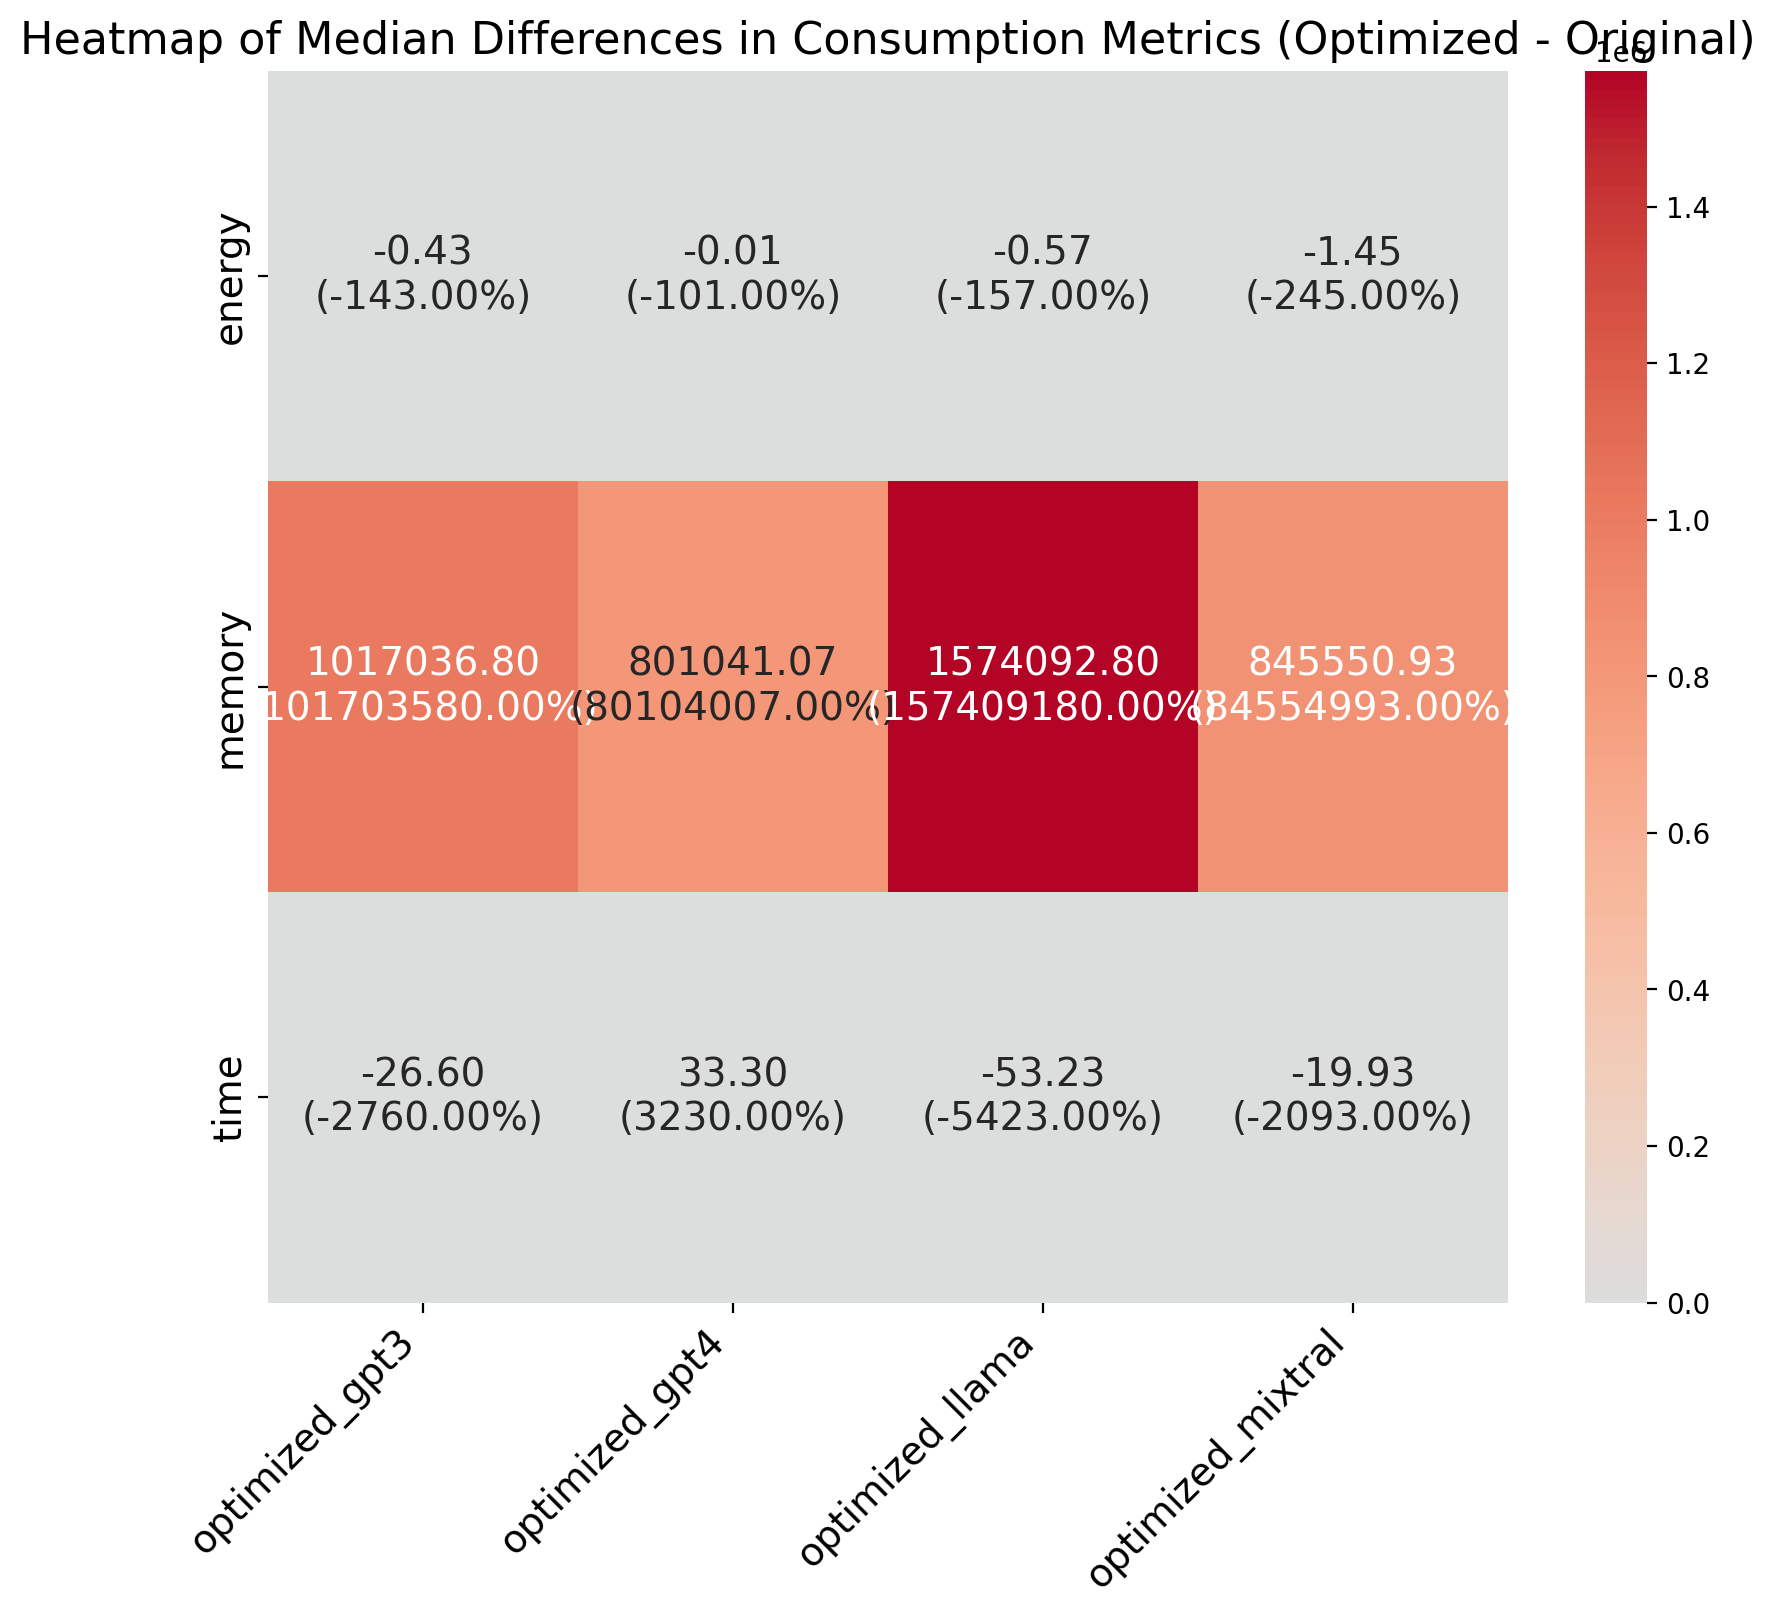

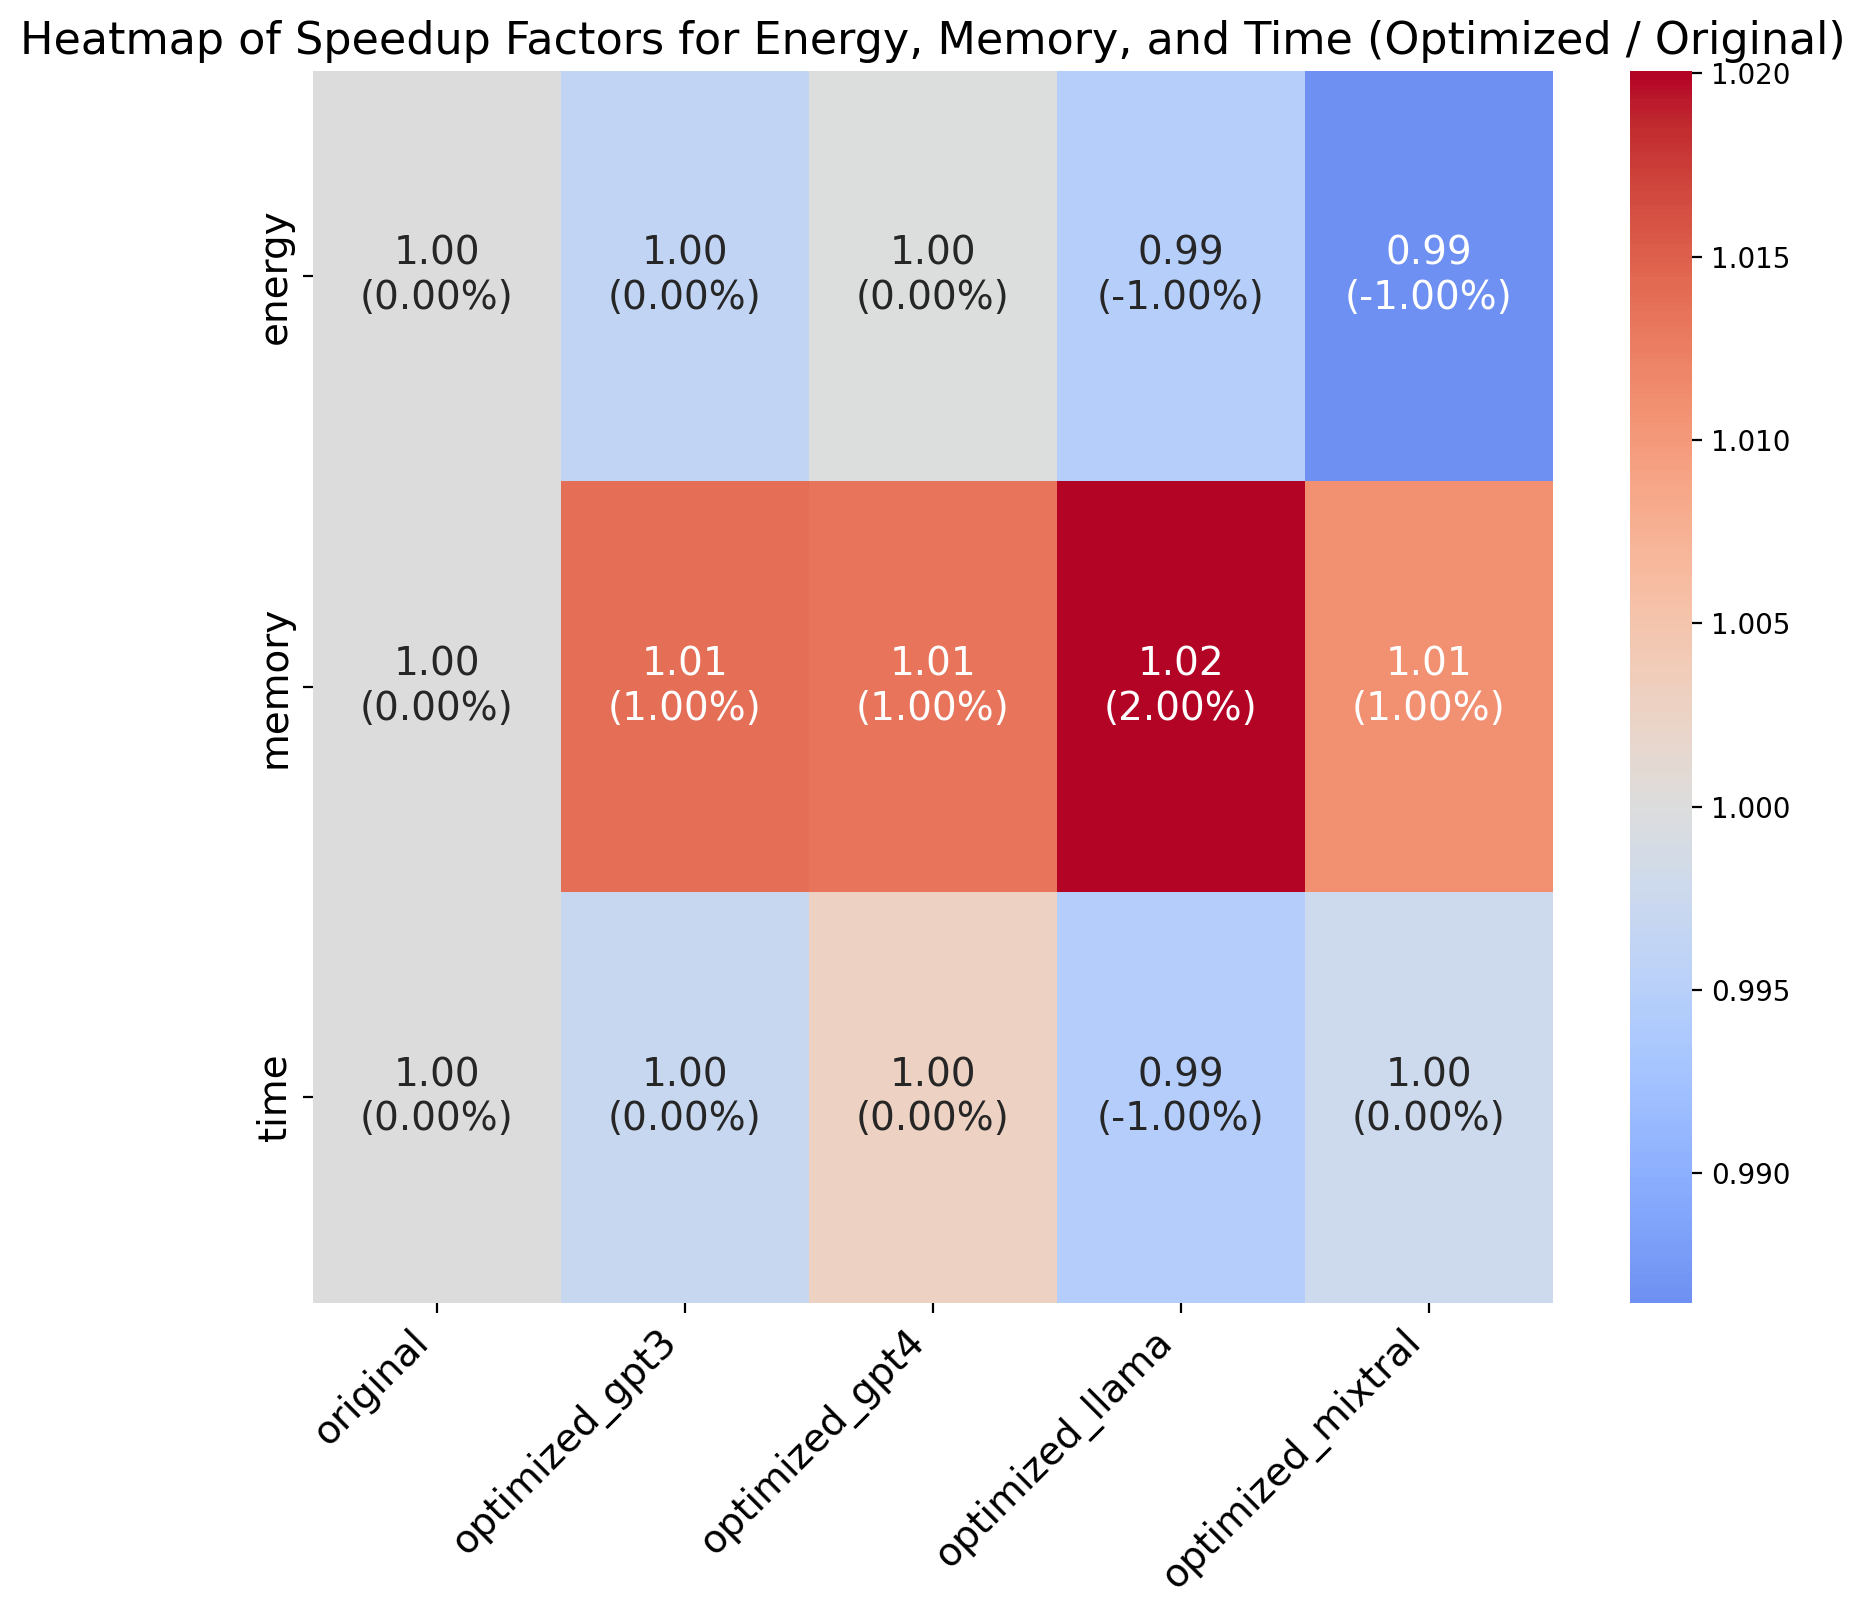

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Metrics to be analyzed
metrics = ['energy', 'memory', 'time']
models = ['original', 'optimized_gpt3', 'optimized_gpt4', 'optimized_llama', 'optimized_mixtral']

# Initialize dictionaries to store the median differences and speedup factors
median_differences = {metric: [] for metric in metrics}
speedup_factors = {metric: [] for metric in metrics}  # Include energy for speedup factors

# Calculate median differences and speedup factors
for metric in metrics:
    for model in models[1:]:  # Skip 'original' for median differences
        median_diff = (df[f'{model}_{metric}'] - df[f'original_{metric}']).median()
        median_differences[metric].append(median_diff)
        
        speedup_factor = (df[f'{model}_{metric}'] / df[f'original_{metric}']).median()
        speedup_factors[metric].append(speedup_factor)

# Add baseline 'original' to speedup_factors dictionary with a value of 1
for metric in metrics:
    speedup_factors[metric].insert(0, 1)

# Convert dictionaries to DataFrames
median_diff_df = pd.DataFrame(median_differences, index=models[1:])
speedup_factors_df = pd.DataFrame(speedup_factors, index=models)

# Function to create a heatmap with percentage annotations
def create_heatmap(data, title, fmt='.2f', center_value=1):
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(data, annot=True, cmap='coolwarm', center=center_value, fmt=fmt, annot_kws={"size": 14})
    
    # Annotate with percentage changes
    for t in ax.texts: 
        if float(t.get_text()) != 1.00:
            t.set_text(f"{float(t.get_text()):.2f}\n({(float(t.get_text()) - 1) * 100:.2f}%)")
        else:
            t.set_text("1.00\n(0.00%)")
    
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

# Generate heatmaps
create_heatmap(median_diff_df.T, 'Heatmap of Median Differences in Consumption Metrics (Optimized - Original)')
create_heatmap(speedup_factors_df.T, 'Heatmap of Speedup Factors for Energy, Memory, and Time (Optimized / Original)', fmt='.2f')


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


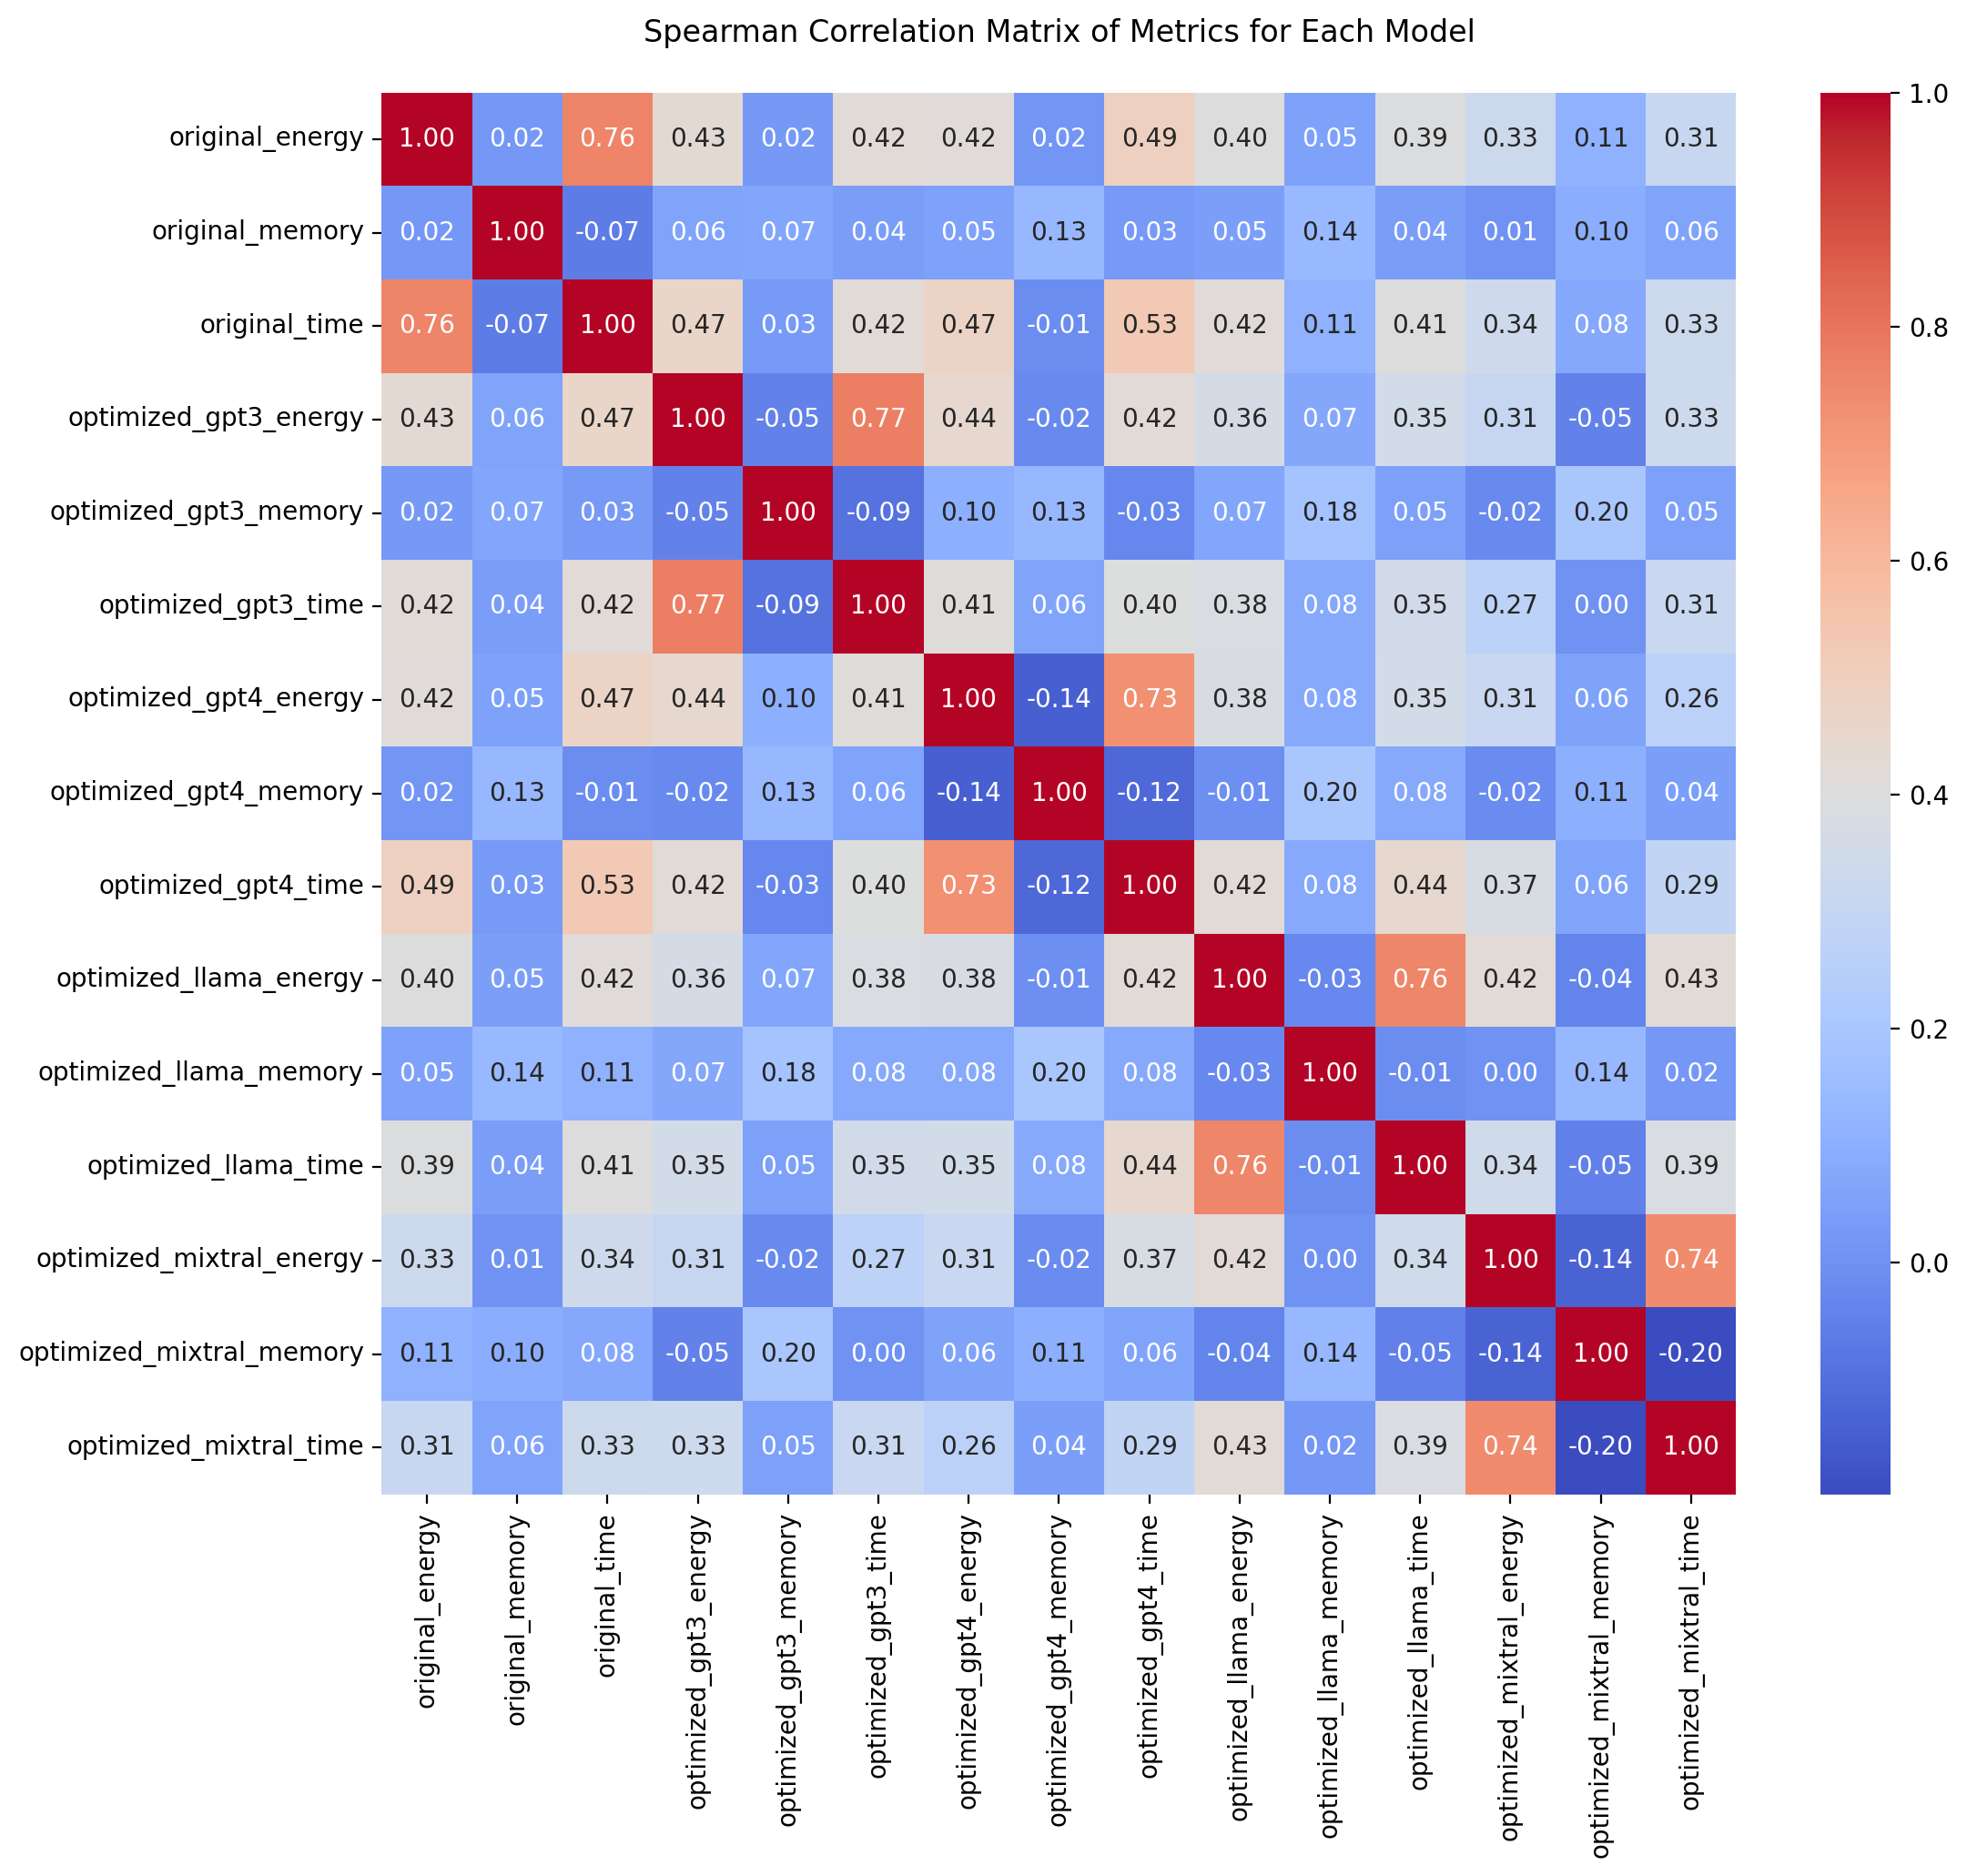

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset Matplotlib style to default
plt.style.use('default')

# Models and metrics
metrics = ['energy', 'memory', 'time']
models = ['original', 'optimized_gpt3', 'optimized_gpt4', 'optimized_llama', 'optimized_mixtral']

# Filter out rows where any of the values for the metrics are zero
relevant_columns = [f'{model}_{metric}' for model in models for metric in metrics]
df_filtered_all = df[(df[relevant_columns] != 0).all(axis=1)]

# Calculate the Spearman correlation matrix
correlation_matrix = np.zeros((len(relevant_columns), len(relevant_columns)))

for i, col1 in enumerate(relevant_columns):
    for j, col2 in enumerate(relevant_columns):
        if i != j:
            corr, _ = spearmanr(df_filtered_all[col1], df_filtered_all[col2])
            correlation_matrix[i, j] = corr
        else:
            correlation_matrix[i, j] = 1

# Convert correlation matrix to DataFrame for better visualization
correlation_matrix_df = pd.DataFrame(correlation_matrix, index=relevant_columns, columns=relevant_columns)

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_df, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0, linecolor='white')
plt.title('Spearman Correlation Matrix of Metrics for Each Model', pad=20)
plt.show()

In [41]:
import pandas as pd
from scipy.stats import pearsonr

# Filter out rows where any of the values for energy or time are zero
df_filtered = df[(df['original_energy'] != 0) & (df['original_time'] != 0)]

# Calculate the Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(df_filtered['original_energy'], df_filtered['original_time'])

print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("The correlation between energy usage and execution time is statistically significant.")
else:
    print("The correlation between energy usage and execution time is not statistically significant.")


Pearson correlation coefficient: 0.947586402071469
P-value: 2.673432964241841e-137
The correlation between energy usage and execution time is statistically significant.


In [42]:
# Models and metrics
metrics = ['energy', 'memory', 'time']
models = ['original', 'optimized_gpt3', 'optimized_gpt4', 'optimized_llama', 'optimized_mixtral']

# Initialize a dictionary to store the results
correlation_results = {}

# Perform Pearson correlation test for each model
for model in models:
    for metric1 in metrics:
        for metric2 in metrics:
            if metric1 != metric2:
                column1 = f'{model}_{metric1}'
                column2 = f'{model}_{metric2}'
                
                # Filter out rows where any of the values for the metrics are zero
                df_filtered = df[(df[column1] != 0) & (df[column2] != 0)]
                
                # Calculate the Pearson correlation coefficient and p-value
                correlation, p_value = pearsonr(df_filtered[column1], df_filtered[column2])
                
                # Store the results
                correlation_results[f'{column1} vs {column2}'] = {
                    'Pearson correlation coefficient': correlation,
                    'P-value': p_value
                }

# Display the results
for pair, result in correlation_results.items():
    print(f"{pair}:")
    print(f"  Pearson correlation coefficient: {result['Pearson correlation coefficient']}")
    print(f"  P-value: {result['P-value']}")
    if result['P-value'] < 0.05:
        print("  The correlation is statistically significant.")
    else:
        print("  The correlation is not statistically significant.")
    print()

original_energy vs original_memory:
  Pearson correlation coefficient: 0.4652384259933385
  P-value: 3.5529839398625913e-16
  The correlation is statistically significant.

original_energy vs original_time:
  Pearson correlation coefficient: 0.947586402071469
  P-value: 2.673432964241841e-137
  The correlation is statistically significant.

original_memory vs original_energy:
  Pearson correlation coefficient: 0.4652384259933385
  P-value: 3.5529839398625913e-16
  The correlation is statistically significant.

original_memory vs original_time:
  Pearson correlation coefficient: 0.5680538090671361
  P-value: 6.741173788822962e-25
  The correlation is statistically significant.

original_time vs original_energy:
  Pearson correlation coefficient: 0.947586402071469
  P-value: 2.673432964241841e-137
  The correlation is statistically significant.

original_time vs original_memory:
  Pearson correlation coefficient: 0.5680538090671361
  P-value: 6.741173788822962e-25
  The correlation is st

In [43]:
from scipy.stats import spearmanr

# Initialize a dictionary to store the results for Spearman's correlation
spearman_results = {}

# Perform Spearman's correlation test for each model
for model in models:
    for metric1 in metrics:
        for metric2 in metrics:
            if metric1 != metric2:
                column1 = f'{model}_{metric1}'
                column2 = f'{model}_{metric2}'
                
                # Filter out rows where any of the values for the metrics are zero
                df_filtered = df[(df[column1] != 0) & (df[column2] != 0)]
                
                # Calculate the Spearman correlation coefficient and p-value
                spearman_corr, spearman_p_value = spearmanr(df_filtered[column1], df_filtered[column2])
                
                # Store the results
                spearman_results[f'{column1} vs {column2}'] = {
                    'Spearman correlation coefficient': spearman_corr,
                    'P-value': spearman_p_value
                }

# Display the results
for pair, result in spearman_results.items():
    print(f"{pair}:")
    print(f"  Spearman correlation coefficient: {result['Spearman correlation coefficient']}")
    print(f"  P-value: {result['P-value']}")
    if result['P-value'] < 0.05:
        print("  The correlation is statistically significant.")
    else:
        print("  The correlation is not statistically significant.")
    print()


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<Axes: xlabel='original_energy', ylabel='Count'>

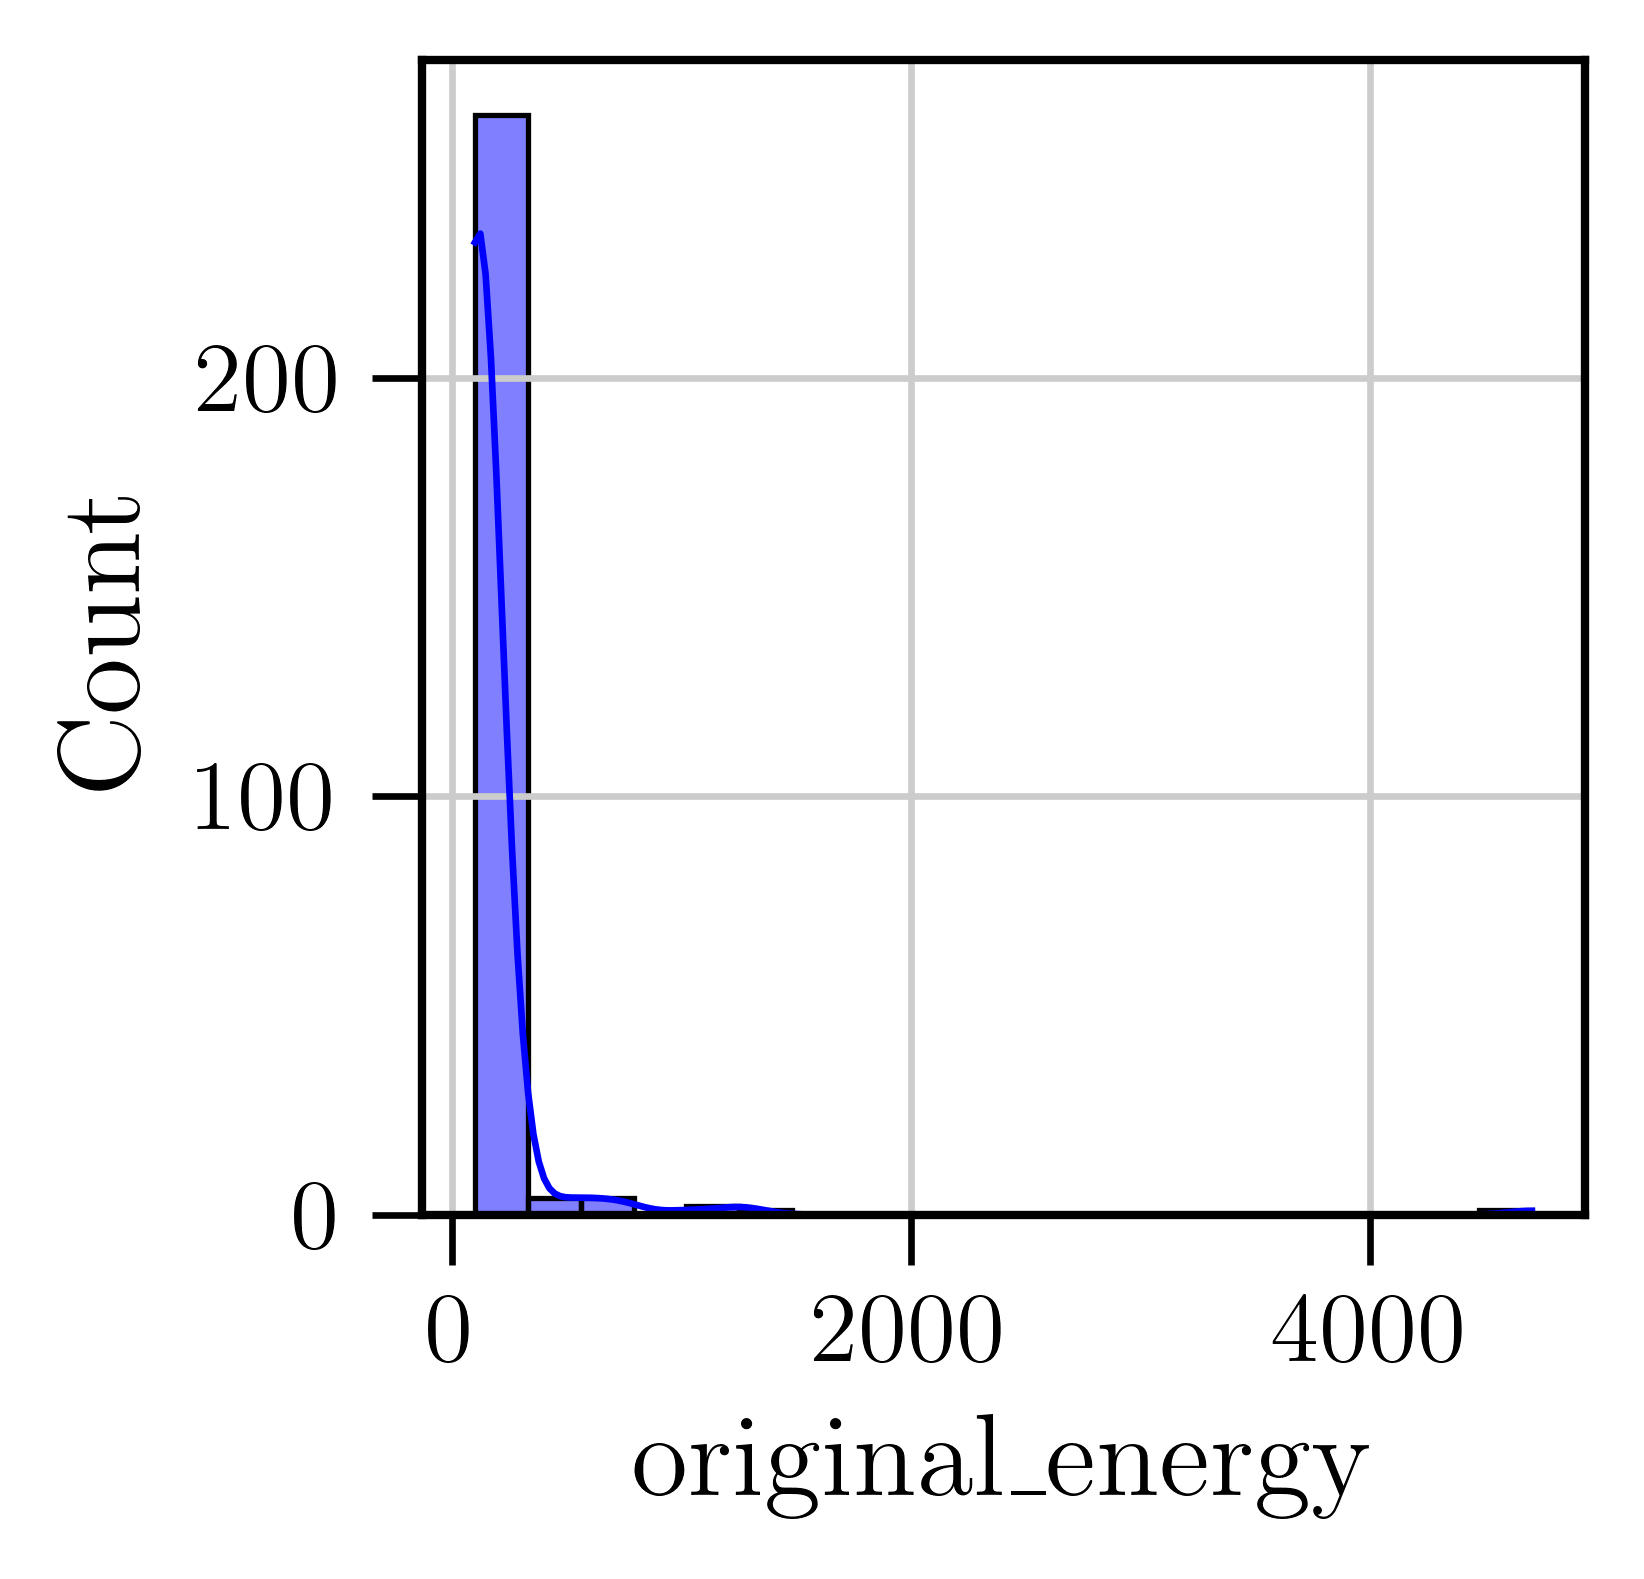

In [47]:
sns.histplot(df['original_energy'], bins=20, kde=True, color='blue', alpha=0.5, label='Original')

/var/folders/sl/9nkjwp050j37649nk4d77v480000gn/T/ipykernel_39531/207148171.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='value', data=melted_df[melted_df['metric'] == metric],
/var/folders/sl/9nkjwp050j37649nk4d77v480000gn/T/ipykernel_39531/207148171.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='value', data=melted_df[melted_df['metric'] == metric],
/var/folders/sl/9nkjwp050j37649nk4d77v480000gn/T/ipykernel_39531/207148171.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='value', dat

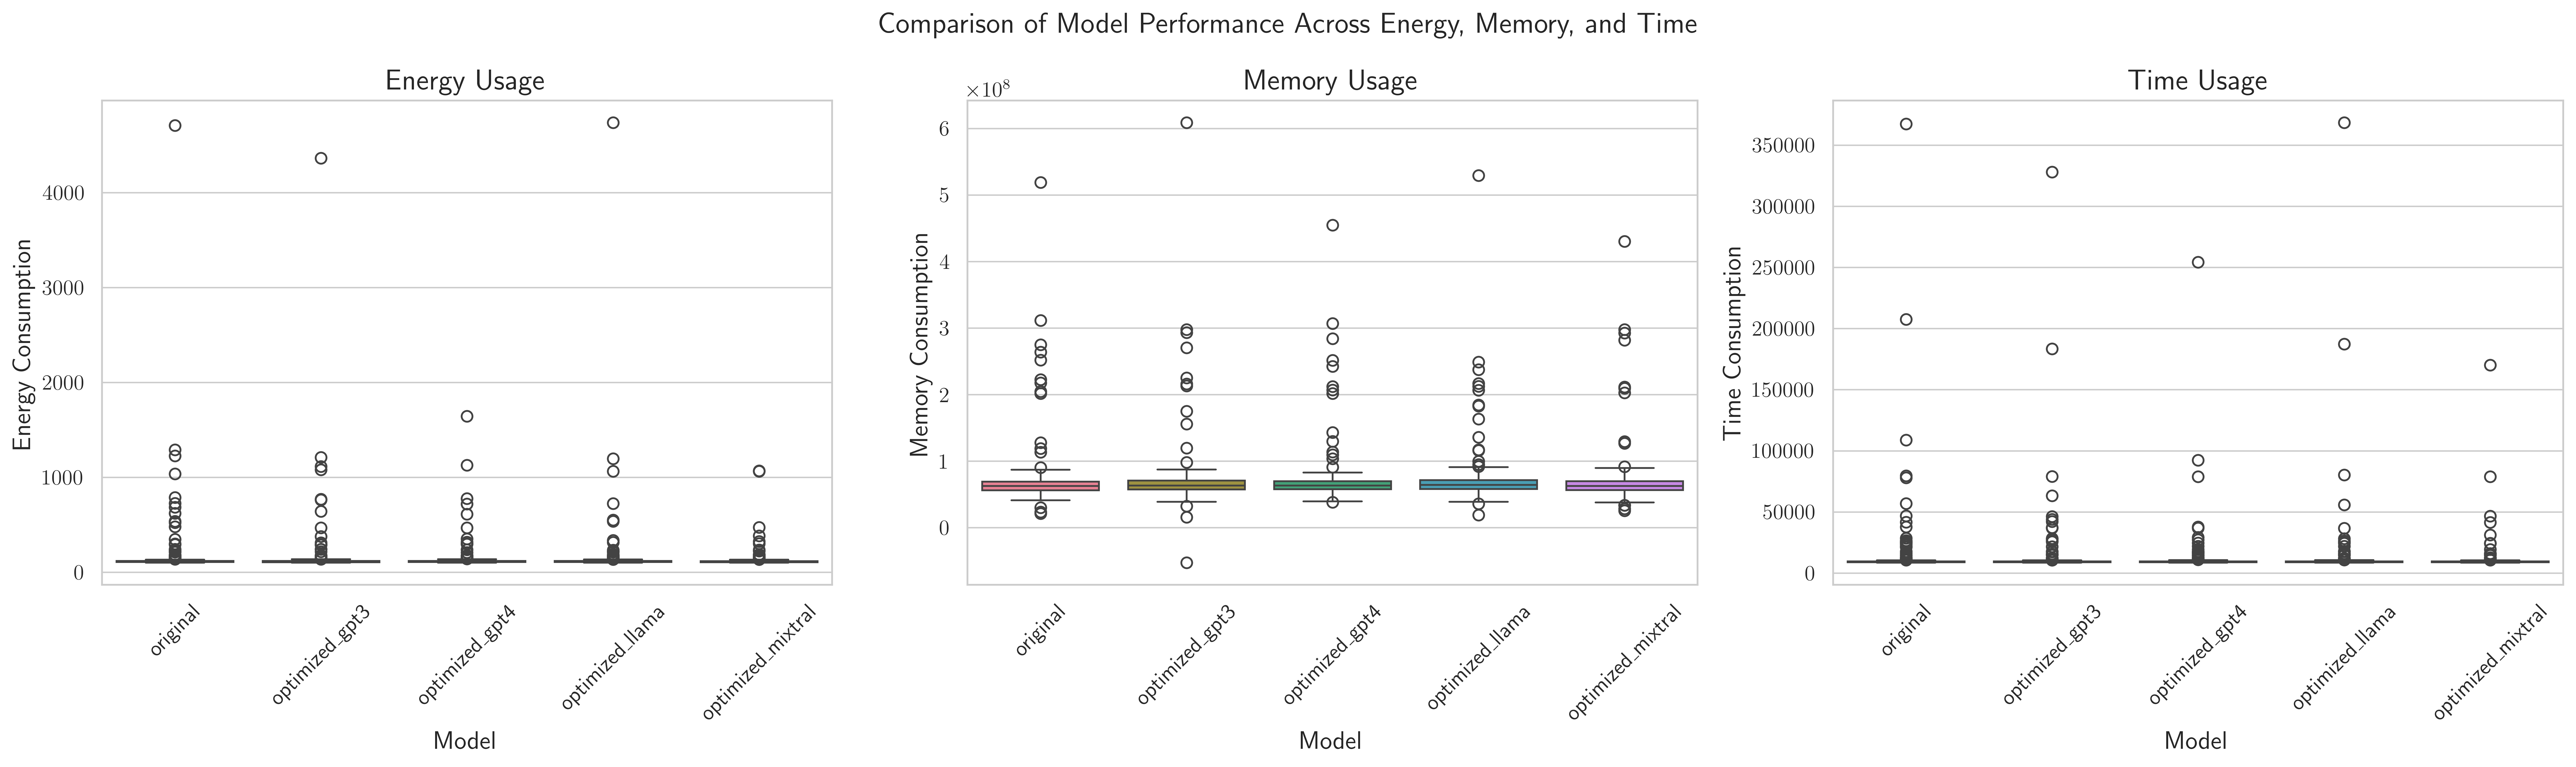

Average Improvements (%):
gpt3_energy: 3.96%
gpt4_energy: 14.85%
llama_energy: 8.11%
mixtral_energy: 21.63%
gpt3_memory: -0.63%
gpt4_memory: -0.63%
llama_memory: -1.50%
mixtral_memory: 1.70%
gpt3_time: 5.39%
gpt4_time: 13.58%
llama_time: 8.03%
mixtral_time: 19.47%


In [48]:
# Assuming 'df' is your DataFrame
# Melt the DataFrame to long format for easier plotting
metrics = ['energy', 'memory', 'time']
id_vars = ['script_name']
models = ['original', 'optimized_gpt3', 'optimized_gpt4', 'optimized_llama', 'optimized_mixtral']

melted_df = pd.melt(df, 
                    id_vars=id_vars, 
                    value_vars=[f'{model}_{metric}' for model in models for metric in metrics],
                    var_name='model_metric', 
                    value_name='value')

melted_df[['model', 'metric']] = melted_df['model_metric'].str.rsplit('_', n=1, expand=True)

# Set up the plot
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Comparison of Model Performance Across Energy, Memory, and Time', fontsize=16)

# Color palette
palette = sns.color_palette("husl", n_colors=len(models))

# Plot for each metric
for i, metric in enumerate(metrics):
    sns.boxplot(x='model', y='value', data=melted_df[melted_df['metric'] == metric],
                ax=axes[i], palette=palette, order=models)
    axes[i].set_title(f'{metric.capitalize()} Usage')
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel(f'{metric.capitalize()} Consumption')
    axes[i].tick_params(axis='x', rotation=45)

    # Add text annotations for median values
    medians = melted_df[melted_df['metric'] == metric].groupby('model')['value'].median()
    # for j, model in enumerate(models):
    #     axes[i].text(j, medians[model], f'{medians[model]:.2f}', 
    #                  horizontalalignment='center', verticalalignment='bottom',
    #                  fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()

# Calculate and print average improvements
improvements = {}
for metric in metrics:
    original = df[f'original_{metric}'].mean()
    for model in ['gpt3', 'gpt4', 'llama', 'mixtral']:
        optimized = df[f'optimized_{model}_{metric}'].mean()
        improvement = (original - optimized) / original * 100
        improvements[f'{model}_{metric}'] = improvement

print("Average Improvements (%):")
for key, value in improvements.items():
    print(f"{key}: {value:.2f}%")

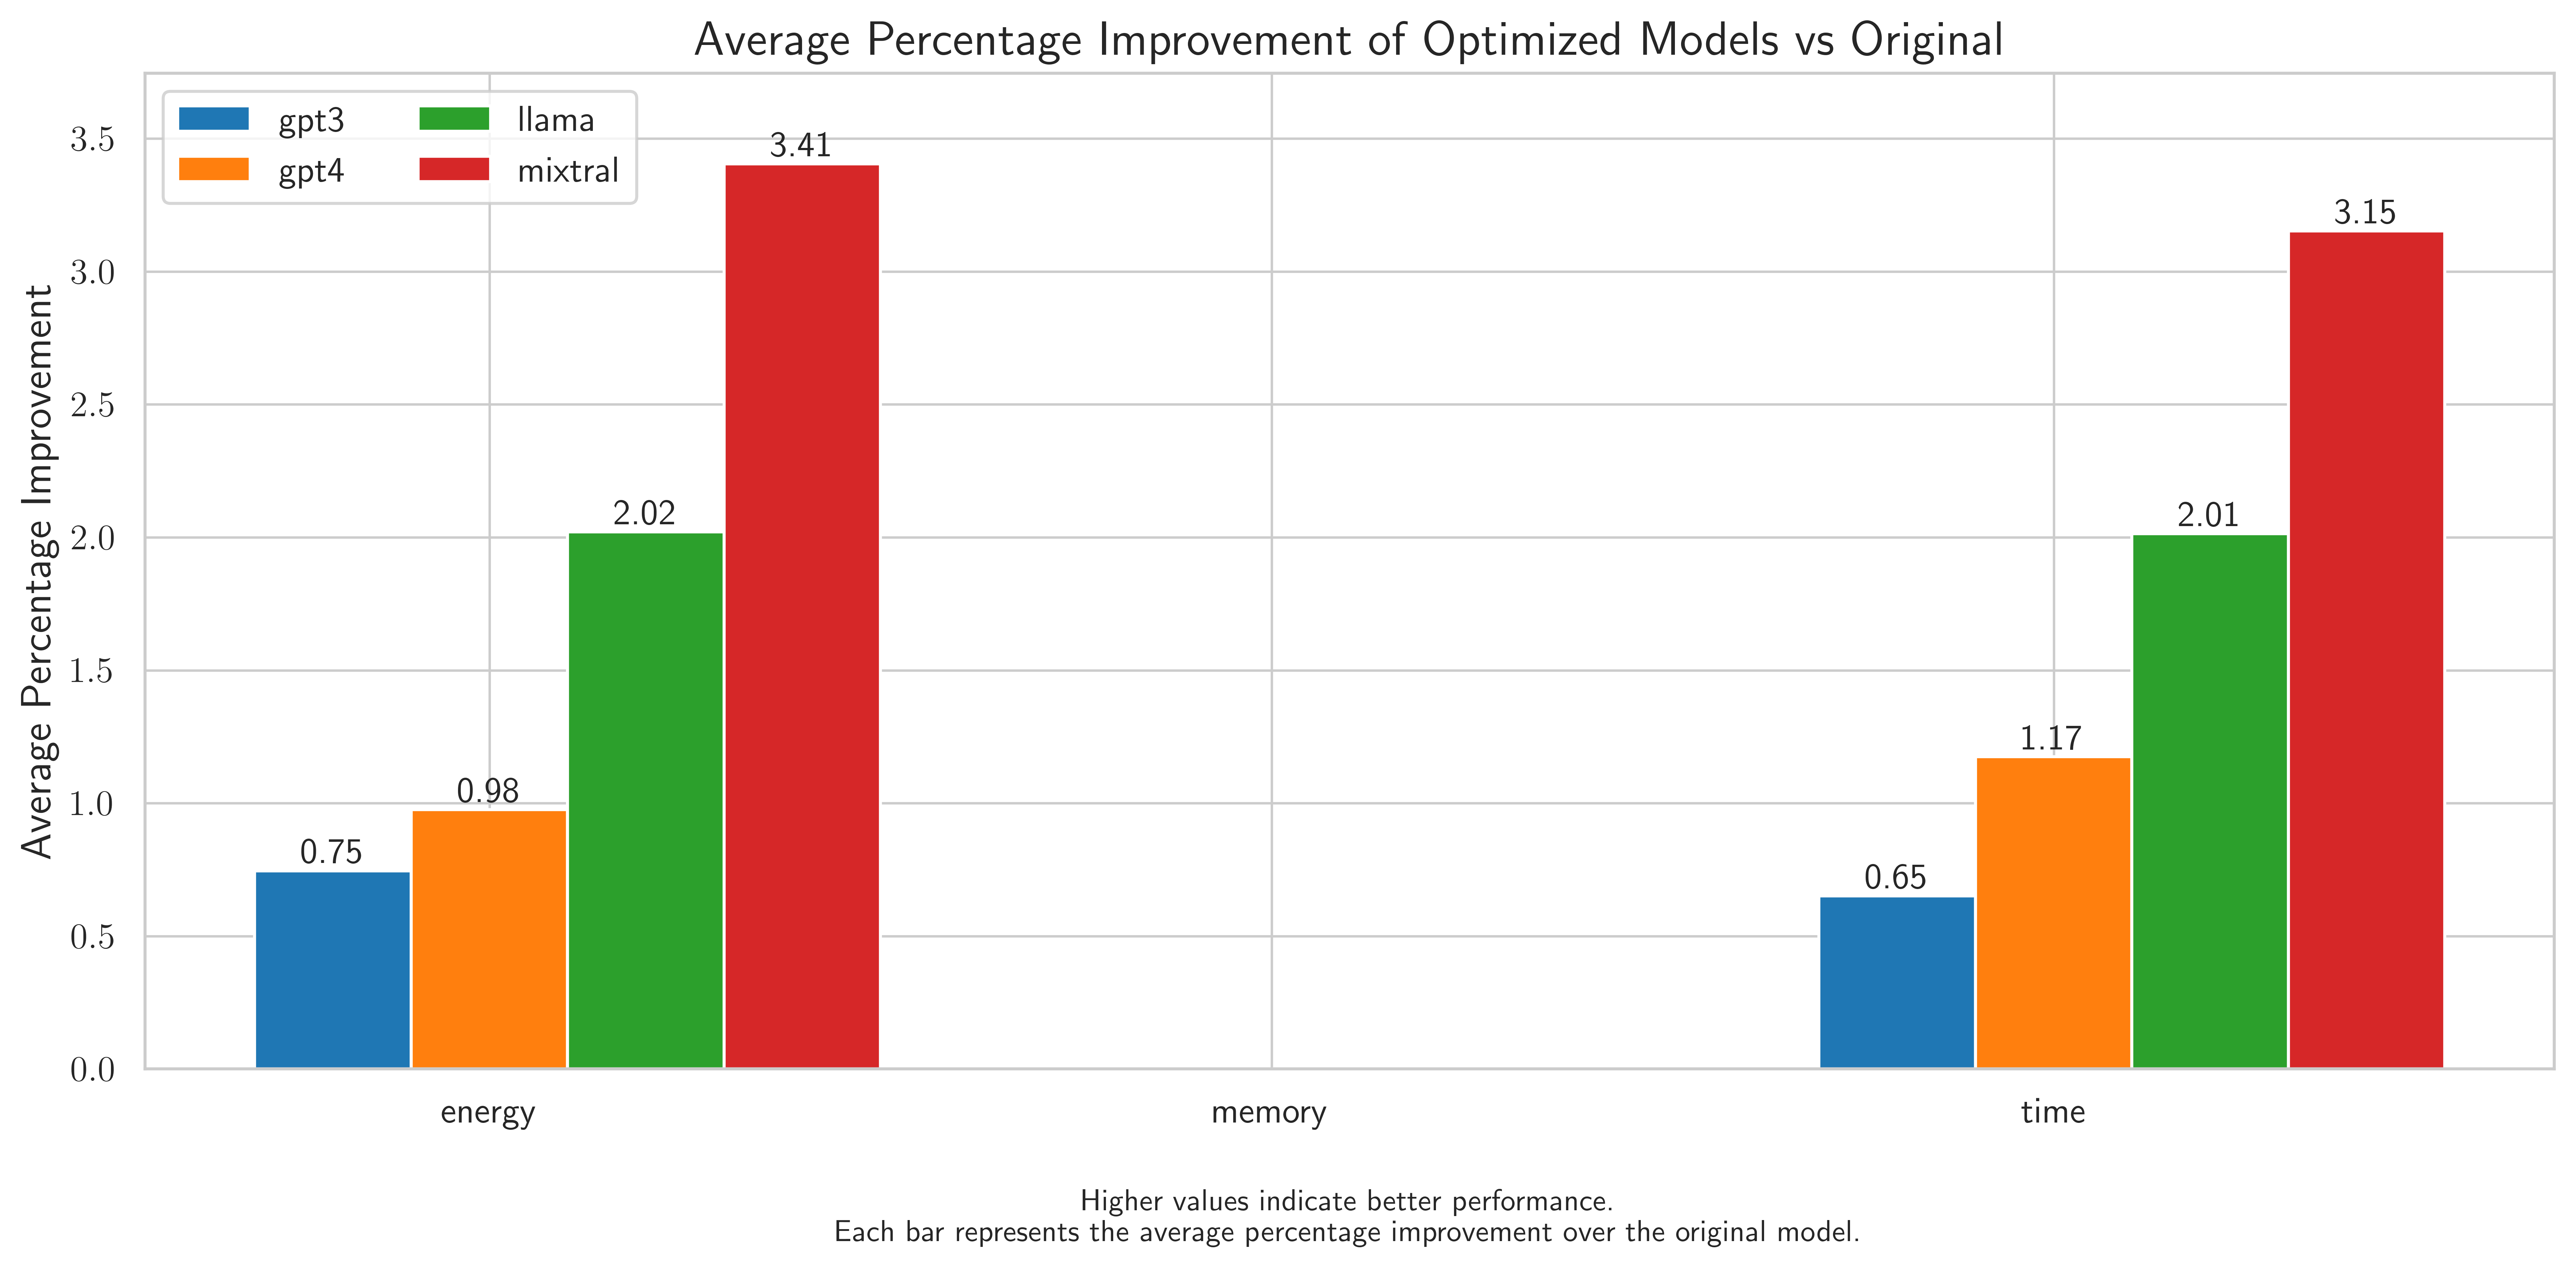


Summary Statistics:

Energy Consumption:
       original_energy  optimized_gpt3_energy  optimized_gpt4_energy  optimized_llama_energy  optimized_mixtral_energy
count       275.000000             275.000000             275.000000              275.000000                275.000000
mean        160.184203             153.847633             136.400639              147.195988                125.535412
std         308.657887             285.313141             130.499538              296.433984                 88.458497
min         100.465297             101.148436              99.629402              100.285295                100.508911
25%         106.873620             106.277522             106.836701              106.613442                106.091541
50%         110.648127             109.804060             110.263502              109.605929                108.690283
75%         119.059781             118.753913             119.165399              118.325241                117.121411
max   

In [49]:
# Assuming 'df' is your DataFrame
metrics = ['energy', 'memory', 'time']
models = ['gpt3', 'gpt4', 'llama', 'mixtral']

# Calculate percentage improvements
improvements = pd.DataFrame(index=metrics, columns=models)

for metric in metrics:
    for model in models:
        original = pd.to_numeric(df[f'original_{metric}'], errors='coerce')
        optimized = pd.to_numeric(df[f'optimized_{model}_{metric}'], errors='coerce')
        improvement = ((original - optimized) / original * 100).mean()
        improvements.loc[metric, model] = improvement

# Ensure all values are numeric
improvements = improvements.astype(float)

# Create bar plot
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(metrics))
width = 0.2
multiplier = 0

for model in models:
    offset = width * multiplier
    rects = ax.bar(x + offset, improvements[model], width, label=model)
    ax.bar_label(rects, fmt='%.2f')
    multiplier += 1

ax.set_ylabel('Average Percentage Improvement')
ax.set_title('Average Percentage Improvement of Optimized Models vs Original')
ax.set_xticks(x + width, metrics)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, improvements.values.max() * 1.1)  # Set y-axis limit to 110% of max value

# Add a text annotation explaining the plot
plt.text(0.5, -0.15, 
         "Higher values indicate better performance.\n"
         "Each bar represents the average percentage improvement over the original model.",
         ha='center', va='center', transform=ax.transAxes, fontsize=10)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
for metric in metrics:
    print(f"\n{metric.capitalize()} Consumption:")
    summary = df[[f'original_{metric}'] + [f'optimized_{model}_{metric}' for model in models]].apply(pd.to_numeric, errors='coerce').describe()
    print(summary.to_string())

In [37]:
df

script_name  original_energy  \
0                                            附件-profit       106.236793   
1                                cheb-test_galleryball       103.784445   
2                                        tools-runTest       121.480022   
3                 chapter8 基于量子遗传算法的函数寻优算法-QuantumMain       103.088433   
4    029_Time series forecasting based on extreme l...         0.000000   
..                                                 ...              ...   
524                                chapter16-chapter16       104.871455   
525                                  simpleWalker-MAIN       109.286048   
526                                     chapter1-BPDLX       113.172772   
527             chapter22 蚁群算法的优化计算——旅行商问题（TSP）优化-main       116.522116   
528  033_Data regression prediction based on partia...       120.111310   

     optimized_gpt3_energy  optimized_gpt4_energy  optimized_llama_energy  \
0               109.775544             104.571878              100.285295   
1               107.966792             104.976427              120.313649   
2               128.938474             125.570610              123.082865   
3               109.804060             103.940732              107.299842   
4                 0.000000               0.000000                0.000000   
..                     ...                    ...                     ...   
524               0.000000               0.000000                0.000000   
525               0.000000               0.000000                0.000000   
526               0.000000               0.000000                0.000000   
527               0.000000               0.000000                0.000000   
528               0.000000               0.000000                0.000000   

     optimized_mixtral_energy  baseline_energy  original_memory  \
0                  120.497503                0     6.359054e+07   
1                  110.792849                0     7.824493e+07   
2                  111.750414                0     4.932977e+07   
3                  105.369954                0     6.111846e+07   
4                  119.383664                0     0.000000e+00   
..                        ...              ...              ...   
524                  0.000000                0     5.786665e+07   
525                  0.000000                0     7.042608e+07   
526                  0.000000                0     6.451514e+07   
527                  0.000000                0     7.020899e+07   
528                  0.000000                0     5.438191e+07   

     optimized_gpt3_memory  optimized_gpt4_memory  ...  original_time  \
0             5.726044e+07           8.280569e+07  ...    9123.300000   
1             6.596799e+07           6.825588e+07  ...    8889.833333   
2             5.904534e+07           6.287251e+07  ...   10063.500000   
3             6.356664e+07           7.033665e+07  ...    8783.333333   
4             0.000000e+00           0.000000e+00  ...       0.000000   
..                     ...                    ...  ...            ...   
524           0.000000e+00           0.000000e+00  ...    8763.266667   
525           0.000000e+00           0.000000e+00  ...    8616.366667   
526           0.000000e+00           0.000000e+00  ...    8689.966667   
527           0.000000e+00           0.000000e+00  ...    8776.666667   
528           0.000000e+00           0.000000e+00  ...    9676.866667   

     optimized_gpt3_time  optimized_gpt4_time  optimized_llama_time  \
0            9256.866667          8850.100000           8749.900000   
1            9536.900000          8543.066667           9810.200000   
2           10823.900000         10403.800000          10263.733333   
3            9203.333333          8676.566667           8956.766667   
4               0.000000             0.000000              0.000000   
..                   ...                  ...                   ...   
524             0.000000             0